In [68]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

In [69]:
# 고객 및 주거래계좌 정보(CUS_INFO.CSV)
cus = pd.read_csv('cus_info_new.csv', encoding='cp949')

# 종목정보(IEM_INFO.CSV)
iem= pd.read_csv('iem_info_20210902.csv')

# 국내주식 잔고이력(STK_BNC_HIST.CSV) _ 잔고정보 (국내 주식건에 한해) <- 여기세 종목 정보 들어있음
hist = pd.read_csv('stk_bnc_hist.csv')

# 국내주식 보유기간(STK_HLD_.CSV)
test = pd.read_csv('test_0926.csv', encoding='cp949')
train = pd.read_csv('train_매도일추가.csv')

# submission file
submission = pd.read_csv('sample_submission.csv')

In [70]:
cus.columns=["계좌 ID","성별","연령대","투자성향","자산구간","주거래상품군","Life Style","서비스 등급","총 투자기간","주거래업종구분"]
iem.columns= ["종목코드","종목한글명","종목업종", "시가총액 규모유형","시장구분"]
hist.columns= ["계좌 ID","기준일자","종목코드","잔고수량","잔고금액","주당 액면가"]

# cus_info LIFESTAGE안으로 묶기

In [71]:
import warnings
warnings.filterwarnings(action='ignore')

In [72]:
cus['LifeStyle_new']= np.nan

In [73]:
cus.loc[(cus['성별']==1) & (cus['연령대']==1) & (cus['Life Style']==2),'LifeStyle_new'] = 1
cus.loc[(cus['성별']==2) & (cus['연령대']==1) & (cus['Life Style']==2),'LifeStyle_new'] = 2
cus.loc[(cus['성별']==1) & (cus['연령대']==2) & (cus['Life Style']==2),'LifeStyle_new'] = 3
cus.loc[(cus['성별']==2) & (cus['연령대']==2) & (cus['Life Style']==2),'LifeStyle_new'] = 4

cus.loc[(cus['성별']==1) & (cus['연령대']==3) & (cus['Life Style']==3),'LifeStyle_new'] = 5
cus.loc[(cus['성별']==2) & (cus['연령대']==3) & (cus['Life Style']==4),'LifeStyle_new'] = 6
cus.loc[(cus['성별']==1) & (cus['연령대']==4) & (cus['Life Style']==3),'LifeStyle_new'] = 7
cus.loc[(cus['성별']==2) & (cus['연령대']==4) & (cus['Life Style']==4),'LifeStyle_new'] = 8

cus.loc[(cus['성별']==1) & (cus['연령대']==5) & (cus['Life Style']==5),'LifeStyle_new'] = 9
cus.loc[(cus['성별']==2) & (cus['연령대']==5) & (cus['Life Style']==6),'LifeStyle_new'] = 10

cus.loc[(cus['성별']==1) & (cus['연령대']==6) & (cus['Life Style']==5),'LifeStyle_new'] = 11
cus.loc[(cus['성별']==2) & (cus['연령대']==6) & (cus['Life Style']==6),'LifeStyle_new'] = 12
cus.loc[(cus['성별']==1) & (cus['연령대']==7) & (cus['Life Style']==5),'LifeStyle_new'] = 13
cus.loc[(cus['성별']==2) & (cus['연령대']==7) & (cus['Life Style']==6),'LifeStyle_new'] = 14
cus.loc[(cus['성별']==1) & (cus['연령대']==8) & (cus['Life Style']==5),'LifeStyle_new'] = 15
cus.loc[(cus['성별']==2) & (cus['연령대']==8) & (cus['Life Style']==6),'LifeStyle_new'] = 16

cus.loc[(cus['성별']==1) & (cus['연령대']==5) & (cus['Life Style']==7),'LifeStyle_new'] = 17
cus.loc[(cus['성별']==2) & (cus['연령대']==5) & (cus['Life Style']==8),'LifeStyle_new'] = 18
cus.loc[(cus['성별']==1) & (cus['연령대']==6) & (cus['Life Style']==7),'LifeStyle_new'] = 19
cus.loc[(cus['성별']==2) & (cus['연령대']==6) & (cus['Life Style']==8),'LifeStyle_new'] = 20
cus.loc[(cus['성별']==1) & (cus['연령대']==7) & (cus['Life Style']==7),'LifeStyle_new'] = 21
cus.loc[(cus['성별']==2) & (cus['연령대']==7) & (cus['Life Style']==8),'LifeStyle_new'] = 22
cus.loc[(cus['성별']==1) & (cus['연령대']==8) & (cus['Life Style']==7),'LifeStyle_new'] = 23
cus.loc[(cus['성별']==2) & (cus['연령대']==8) & (cus['Life Style']==8),'LifeStyle_new'] = 24

cus.loc[(cus['성별']==1) & (cus['연령대']==9) & (cus['Life Style']==9),'LifeStyle_new'] = 25
cus.loc[(cus['성별']==2) & (cus['연령대']==9) & (cus['Life Style']==9),'LifeStyle_new'] = 26

In [74]:
cus['LifeStyle_new']=cus['LifeStyle_new'].fillna(99)

In [120]:
what = cus[cus['LifeStyle_new']==99][['성별','연령대','Life Style']]

In [121]:
what[what['성별']==1]

,성별,연령대,Life Style
32,1,6,6
1534,1,9,5
2090,1,8,6
7042,1,3,2
8635,1,6,6


In [123]:
what[what['성별']==2]

,성별,연령대,Life Style
2,2,7,5
3,2,6,5
24,2,5,5
29,2,7,5
43,2,7,5
...,...,...,...
9960,2,5,5
9968,2,5,5
9978,2,8,5
9981,2,8,5


In [44]:
df_1 = pd.merge(train, cus,on=['계좌 ID'])
df_1 = pd.merge(df_1, iem, on=['종목코드'])

In [45]:
from tqdm import tqdm
num_list = sorted(set(cus['LifeStyle_new']))
tmp1 = pd.DataFrame(columns=num_list)
for i in tqdm(num_list):
    tmp2 = df_1[df_1['LifeStyle_new']==i]
    tmp1.loc[:,i] = tmp2.T.loc['보유기간(일)'].reset_index(drop=True).astype(float)
    corr = tmp1.corr()

  0%|          | 0/27 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [15]:
corr

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,99.0
1.0,1.000000,0.005498,0.002469,0.017199,0.004065,-0.008748,-0.011753,0.003174,-0.011595,0.009067,...,-0.001377,0.006476,-0.022926,0.017602,0.007028,-0.010214,-0.008306,0.008715,0.006542,-0.006481
2.0,0.005498,1.000000,-0.006792,-0.008776,0.004346,-0.010651,-0.011625,0.004716,0.017793,0.020352,...,0.003141,-0.011004,0.013238,-0.001965,0.035618,0.000151,0.005463,-0.004675,-0.002241,-0.010235
3.0,0.002469,-0.006792,1.000000,0.000956,0.007774,-0.015809,-0.005231,0.020786,-0.000718,0.000923,...,0.017345,0.006567,0.006941,-0.012429,0.001642,-0.011582,0.003928,0.000423,-0.007978,0.004655
4.0,0.017199,-0.008776,0.000956,1.000000,0.002184,-0.008663,0.013706,0.008861,0.027981,0.000464,...,0.000753,-0.010199,0.011394,0.030854,0.013106,-0.000893,-0.006802,-0.015623,-0.000101,0.006700
5.0,0.004065,0.004346,0.007774,0.002184,1.000000,-0.020481,0.021584,0.000180,-0.001440,-0.006998,...,0.031899,-0.005416,-0.003519,-0.010946,0.033119,0.008510,-0.006602,0.012255,0.011979,0.017836
6.0,-0.008748,-0.010651,-0.015809,-0.008663,-0.020481,1.000000,0.025232,0.022836,0.005075,0.002272,...,0.019376,-0.000774,-0.008522,-0.004987,-0.001369,0.007828,-0.000545,0.001619,0.004980,0.013422
7.0,-0.011753,-0.011625,-0.005231,0.013706,0.021584,0.025232,1.000000,0.011432,0.037633,0.005704,...,0.008631,-0.004783,0.011836,-0.015889,0.002869,-0.007405,-0.007202,0.013905,0.010484,0.001703
8.0,0.003174,0.004716,0.020786,0.008861,0.000180,0.022836,0.011432,1.000000,0.000624,0.009431,...,0.006677,0.014319,-0.014077,-0.008406,-0.003989,0.003313,0.017210,-0.006395,-0.016137,0.000543
9.0,-0.011595,0.017793,-0.000718,0.027981,-0.001440,0.005075,0.037633,0.000624,1.000000,0.002748,...,-0.006861,-0.002742,0.001402,0.028688,0.014039,-0.001097,0.006028,-0.011465,0.009392,-0.008438
10.0,0.009067,0.020352,0.000923,0.000464,-0.006998,0.002272,0.005704,0.009431,0.002748,1.000000,...,-0.013706,-0.012801,0.007463,-0.010857,0.029844,0.015574,0.004330,0.003745,0.009353,-0.005742


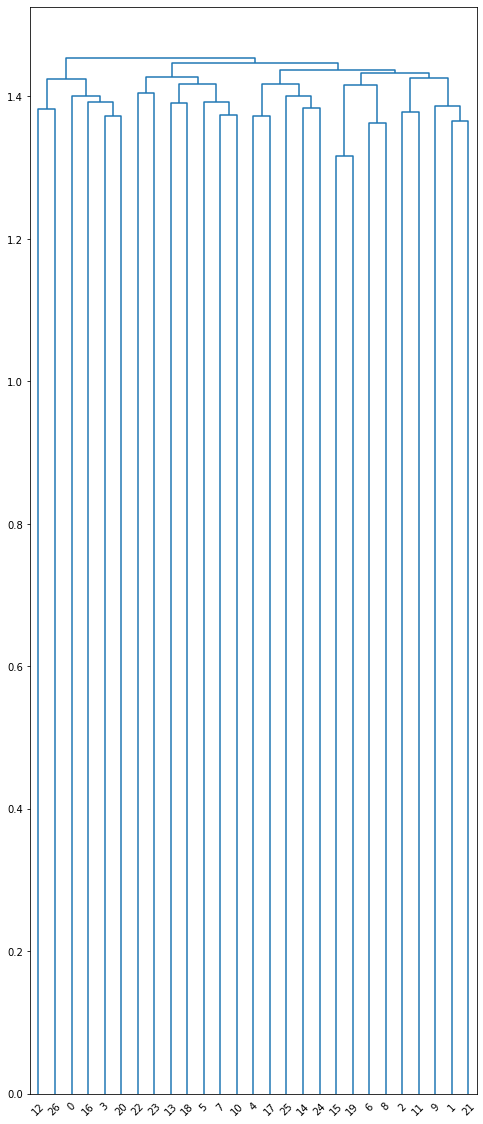

In [16]:
plt.figure(figsize=(8,20))
dend=sch.dendrogram(sch.linkage(corr,method='complete'))

In [17]:
sch.fcluster(sch.linkage(corr ,method='complete'), 5, criterion='maxclust')

array([1, 5, 5, 1, 3, 2, 4, 2, 4, 5, 2, 5, 1, 2, 3, 4, 1, 3, 2, 4, 1, 5,
       2, 2, 3, 3, 1], dtype=int32)

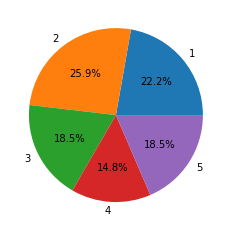

In [121]:
import matplotlib.pyplot as plt
data = [6,7,5,4,5]
labels= ['1','2','3','4','5']
plt.pie(data,labels=labels, autopct='%.1f%%')
plt.show()

In [122]:
sch.fcluster(sch.linkage(corr ,method='complete'),4, criterion='maxclust')

array([1, 4, 4, 1, 3, 2, 4, 2, 4, 4, 2, 4, 1, 2, 3, 4, 1, 3, 2, 4, 1, 4,
       2, 2, 3, 3, 1], dtype=int32)

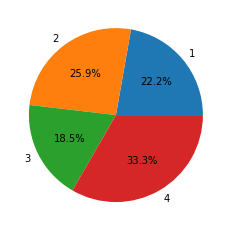

In [123]:
data = [6,7, 5, 9]
labels= ['1','2','3','4']
plt.pie(data,labels=labels, autopct='%.1f%%')
plt.show()

In [136]:
sch.fcluster(sch.linkage(corr ,method='complete'),6, criterion='maxclust')

array([1, 6, 6, 1, 4, 3, 5, 3, 5, 6, 3, 6, 1, 3, 4, 5, 1, 4, 3, 5, 1, 6,
       2, 2, 4, 4, 1], dtype=int32)

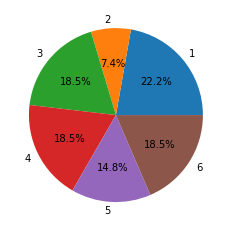

In [137]:
data = [6,2, 5, 5,4, 5]
labels= ['1','2','3','4','5','6']
plt.pie(data,labels=labels, autopct='%.1f%%')
plt.show()

In [45]:
sch.fcluster(sch.linkage(corr ,method='complete'),3, criterion='maxclust')

array([1, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 1, 2, 3, 3, 1, 3, 2, 3, 1, 3,
       2, 2, 3, 3, 1], dtype=int32)

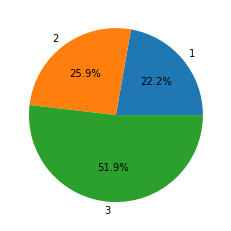

In [46]:
data = [6,7,14]
labels= ['1','2','3']
plt.pie(data,labels=labels, autopct='%.1f%%')
plt.show()

## lifestage cluster 종류별로

In [10]:
# 상관계수 바탕으로 클러스터링 ##5개
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
pdist = sch.distance.pdist(corr.values)
clust=pd.DataFrame(sch.fcluster(sch.linkage(corr ,method='complete'), 5, criterion='maxclust'))
clust.columns = ['lifestage_cluster']
clust['lifestage'] = sorted(num_list)

In [11]:
# 카드 클러스터링 결과 정리
num_cl_dict = {}
for i in set(clust['lifestage_cluster']):
    num_cl_dict[i] = clust[clust['lifestage_cluster']==i]['lifestage'].values.tolist()
num_cl_dict

{1: [1.0, 4.0, 13.0, 17.0, 21.0, 99.0],
 2: [6.0, 8.0, 11.0, 14.0, 19.0, 23.0, 24.0],
 3: [5.0, 15.0, 18.0, 25.0, 26.0],
 4: [7.0, 9.0, 16.0, 20.0],
 5: [2.0, 3.0, 10.0, 12.0, 22.0]}

In [46]:
cus['lifestage_cluster_5']= np.nan

In [13]:
cus.loc[(cus['LifeStyle_new']==1),'lifestage_cluster_5'] =1
cus.loc[(cus['LifeStyle_new']==4),'lifestage_cluster_5'] =1
cus.loc[(cus['LifeStyle_new']==13),'lifestage_cluster_5'] =1
cus.loc[(cus['LifeStyle_new']==17),'lifestage_cluster_5'] =1
cus.loc[(cus['LifeStyle_new']==21),'lifestage_cluster_5'] =1
cus.loc[(cus['LifeStyle_new']==99),'lifestage_cluster_5'] =1

cus.loc[(cus['LifeStyle_new']==6),'lifestage_cluster_5'] =2
cus.loc[(cus['LifeStyle_new']==8),'lifestage_cluster_5'] =2
cus.loc[(cus['LifeStyle_new']==11),'lifestage_cluster_5'] =2
cus.loc[(cus['LifeStyle_new']==14),'lifestage_cluster_5'] =2
cus.loc[(cus['LifeStyle_new']==19),'lifestage_cluster_5'] =2
cus.loc[(cus['LifeStyle_new']==23),'lifestage_cluster_5'] =2
cus.loc[(cus['LifeStyle_new']==24),'lifestage_cluster_5'] =2

cus.loc[(cus['LifeStyle_new']==5),'lifestage_cluster_5'] =3
cus.loc[(cus['LifeStyle_new']==15),'lifestage_cluster_5'] =3
cus.loc[(cus['LifeStyle_new']==18),'lifestage_cluster_5'] =3
cus.loc[(cus['LifeStyle_new']==25),'lifestage_cluster_5'] =3
cus.loc[(cus['LifeStyle_new']==26),'lifestage_cluster_5'] =3

cus.loc[(cus['LifeStyle_new']==7),'lifestage_cluster_5'] =4
cus.loc[(cus['LifeStyle_new']==9),'lifestage_cluster_5'] =4
cus.loc[(cus['LifeStyle_new']==16),'lifestage_cluster_5'] =4
cus.loc[(cus['LifeStyle_new']==20),'lifestage_cluster_5'] =4

cus.loc[(cus['LifeStyle_new']==2),'lifestage_cluster_5'] =5
cus.loc[(cus['LifeStyle_new']==3),'lifestage_cluster_5'] =5
cus.loc[(cus['LifeStyle_new']==10),'lifestage_cluster_5'] =5
cus.loc[(cus['LifeStyle_new']==12),'lifestage_cluster_5'] =5
cus.loc[(cus['LifeStyle_new']==22),'lifestage_cluster_5'] =5

In [14]:
# 상관계수 바탕으로 클러스터링 ##3개
pdist = sch.distance.pdist(corr.values)
clust=pd.DataFrame(sch.fcluster(sch.linkage(corr ,method='complete'), 3, criterion='maxclust'))
clust.columns = ['lifestage_cluster']
clust['lifestage'] = sorted(num_list)

In [15]:
# 카드 클러스터링 결과 정리
num_cl_dict = {}
for i in set(clust['lifestage_cluster']):
    num_cl_dict[i] = clust[clust['lifestage_cluster']==i]['lifestage'].values.tolist()
num_cl_dict

{1: [1.0, 4.0, 13.0, 17.0, 21.0, 99.0],
 2: [6.0, 8.0, 11.0, 14.0, 19.0, 23.0, 24.0],
 3: [2.0,
  3.0,
  5.0,
  7.0,
  9.0,
  10.0,
  12.0,
  15.0,
  16.0,
  18.0,
  20.0,
  22.0,
  25.0,
  26.0]}

In [75]:
cus['lifestage_cluster_3']= np.nan

In [76]:
cus.loc[(cus['LifeStyle_new']==1),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==4),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==13),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==17),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==21),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==99),'lifestage_cluster_3'] =1

cus.loc[(cus['LifeStyle_new']==6),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==8),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==11),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==14),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==19),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==23),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==24),'lifestage_cluster_3'] =2

cus.loc[(cus['LifeStyle_new']==5),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==15),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==18),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==25),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==26),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==7),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==9),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==16),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==20),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==2),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==3),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==10),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==12),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==22),'lifestage_cluster_3'] =3

In [18]:
# 상관계수 바탕으로 클러스터링 ##4개
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
pdist = sch.distance.pdist(corr.values)
clust=pd.DataFrame(sch.fcluster(sch.linkage(corr ,method='complete'), 4, criterion='maxclust'))
clust.columns = ['lifestage_cluster']
clust['lifestage'] = sorted(num_list)

In [19]:
# 카드 클러스터링 결과 정리
num_cl_dict = {}
for i in set(clust['lifestage_cluster']):
    num_cl_dict[i] = clust[clust['lifestage_cluster']==i]['lifestage'].values.tolist()
num_cl_dict

{1: [1.0, 4.0, 13.0, 17.0, 21.0, 99.0],
 2: [6.0, 8.0, 11.0, 14.0, 19.0, 23.0, 24.0],
 3: [5.0, 15.0, 18.0, 25.0, 26.0],
 4: [2.0, 3.0, 7.0, 9.0, 10.0, 12.0, 16.0, 20.0, 22.0]}

In [20]:
cus['lifestage_cluster_4']= np.nan

In [21]:
cus.loc[(cus['LifeStyle_new']==1),'lifestage_cluster_4'] =1
cus.loc[(cus['LifeStyle_new']==4),'lifestage_cluster_4'] =1
cus.loc[(cus['LifeStyle_new']==13),'lifestage_cluster_4'] =1
cus.loc[(cus['LifeStyle_new']==17),'lifestage_cluster_4'] =1
cus.loc[(cus['LifeStyle_new']==21),'lifestage_cluster_4'] =1
cus.loc[(cus['LifeStyle_new']==99),'lifestage_cluster_4'] =1

cus.loc[(cus['LifeStyle_new']==6),'lifestage_cluster_4'] =2
cus.loc[(cus['LifeStyle_new']==8),'lifestage_cluster_4'] =2
cus.loc[(cus['LifeStyle_new']==11),'lifestage_cluster_4'] =2
cus.loc[(cus['LifeStyle_new']==14),'lifestage_cluster_4'] =2
cus.loc[(cus['LifeStyle_new']==19),'lifestage_cluster_4'] =2
cus.loc[(cus['LifeStyle_new']==23),'lifestage_cluster_4'] =2
cus.loc[(cus['LifeStyle_new']==24),'lifestage_cluster_4'] =2

cus.loc[(cus['LifeStyle_new']==5),'lifestage_cluster_4'] =3
cus.loc[(cus['LifeStyle_new']==15),'lifestage_cluster_4'] =3
cus.loc[(cus['LifeStyle_new']==18),'lifestage_cluster_4'] =3
cus.loc[(cus['LifeStyle_new']==25),'lifestage_cluster_4'] =3
cus.loc[(cus['LifeStyle_new']==26),'lifestage_cluster_4'] =3

cus.loc[(cus['LifeStyle_new']==7),'lifestage_cluster_4'] =4
cus.loc[(cus['LifeStyle_new']==9),'lifestage_cluster_4'] =4
cus.loc[(cus['LifeStyle_new']==16),'lifestage_cluster_4'] =4
cus.loc[(cus['LifeStyle_new']==20),'lifestage_cluster_4'] =4
cus.loc[(cus['LifeStyle_new']==2),'lifestage_cluster_4'] =4
cus.loc[(cus['LifeStyle_new']==3),'lifestage_cluster_4'] =4
cus.loc[(cus['LifeStyle_new']==10),'lifestage_cluster_4'] =4
cus.loc[(cus['LifeStyle_new']==12),'lifestage_cluster_4'] =4
cus.loc[(cus['LifeStyle_new']==22),'lifestage_cluster_4'] =4

In [77]:
cus.columns

Index(['계좌 ID', '성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Style', '서비스 등급',
       '총 투자기간', '주거래업종구분', 'LifeStyle_new', 'lifestage_cluster_3'],
      dtype='object')

# column drop

In [50]:
cus.drop(['LifeStyle_new','주거래상품군','자산구간'], axis=1, inplace=True)

In [51]:
cus.columns

Index(['계좌 ID', '투자성향', '서비스 등급', '총 투자기간', '주거래업종구분', 'lifestage_cluster_3'], dtype='object')

# cus_info_new.csv: 주거래 구분 과 iem_info.csv 

In [33]:
cus.head(1)

,계좌 ID,투자성향,서비스 등급,총 투자기간,주거래업종구분,lifestage_cluster
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,4,3,6,16,4.0


In [34]:
iem.head(1)

,종목코드,종목한글명,종목업종,시가총액 규모유형,시장구분
0,A000020,동화약품,8,2,99


In [52]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [53]:
train['매도일자'][681471] = '2019-03-29'
train['매도_년'][681471] = '2019'
train['매도_월'][681471] = '03'
train['매도_일'][681471] = '29'

In [78]:
# df는 cus, iem, train merge
df = pd.merge(train, cus,on=['계좌 ID'])
df = pd.merge(df, iem, on=['종목코드'])

In [55]:
df['주거래업종_매수']= np.nan

df.loc[df['주거래업종구분']== df['종목업종'],'주거래업종_매수' ] = 1
df.loc[df['주거래업종구분']== 15 ,'주거래업종_매수' ] = 1
df.loc[df['주거래업종구분']!= df['종목업종'],'주거래업종_매수' ] = 0
df.loc[df['주거래업종구분']== 16 ,'주거래업종_매수' ] = 0

In [56]:
df.drop(['주거래업종구분','종목업종'], axis=1, inplace=True)

In [57]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '매수_월', '매수_일',
       '매도_년', '매도_월', '매도_일', '투자성향', '서비스 등급', '총 투자기간',
       'lifestage_cluster_3', '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수'],
      dtype='object')

In [40]:
df.head(2)

,계좌 ID,종목코드,매수일자,보유기간(일),oil_3_0.8,copper_3_0.8,base_3_0.8,exchange_3_0.8,Rank,매도일자,...,매도_월,매도_일,투자성향,서비스 등급,총 투자기간,lifestage_cluster,종목한글명,시가총액 규모유형,시장구분,주거래업종_매수
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,2018-07-26,11,69.12,6267.30,1.50,1134.10,75.0,2018-08-10,...,8.0,10.0,3,5,5,3.0,GS건설,1,1,0.0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,2020-01-16,2,57.89,6268.96,1.25,1153.83,97.0,2020-01-20,...,1.0,20.0,3,5,5,3.0,GS건설,1,1,0.0


findfont: Font family ['AppleGothic.ttf'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic.ttf'] not found. Falling back to DejaVu Sans.


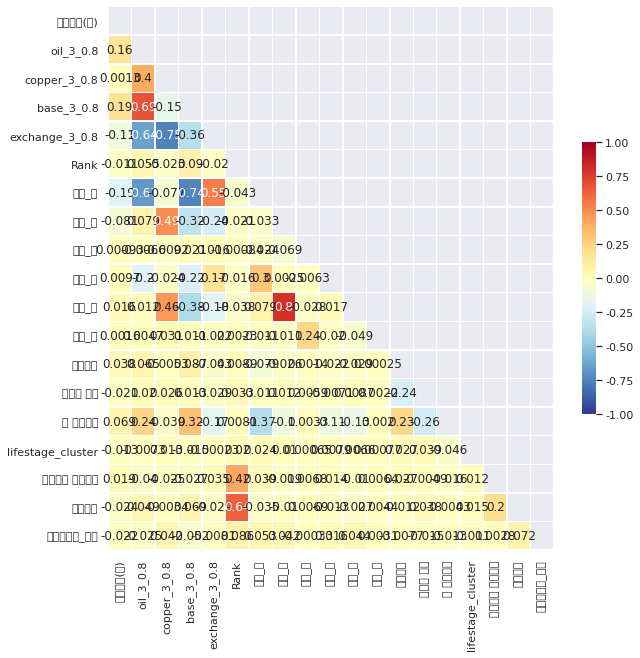

In [215]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           ) 
sns.set(font= 'AppleGothic.ttf')
plt.show()

In [30]:
df.corr()

,보유기간(일),oil_3_0.8,copper_3_0.8,base_3_0.8,exchange_3_0.8,Rank,매수_년,매수_월,매수_일,매도_년,...,매도_일,투자성향,서비스 등급,총 투자기간,lifestage_cluster_5,lifestage_cluster_3,lifestage_cluster_4,시가총액 규모유형,시장구분,주거래업종_매수
보유기간(일),1.000000,0.164186,0.001289,0.186410,-0.108136,-0.011404,-0.193461,-0.080879,0.000932,0.009749,...,0.001585,0.038292,-0.020935,0.069265,-0.013011,-0.010463,-0.009262,0.018974,-0.023623,-0.021522
oil_3_0.8,0.164186,1.000000,0.400314,0.686591,-0.640206,0.054873,-0.667727,0.079480,-0.006621,-0.199926,...,0.004652,0.065473,0.019680,0.237642,-0.007314,0.000458,0.000040,-0.039525,0.048609,-0.024506
copper_3_0.8,0.001289,0.400314,1.000000,-0.150052,-0.749635,-0.022974,-0.077221,0.493495,-0.009220,-0.023565,...,0.031498,-0.005321,0.025681,-0.038701,0.012796,0.008233,0.010685,-0.024851,-0.003445,0.042119
base_3_0.8,0.186410,0.686591,-0.150052,1.000000,-0.357069,0.089945,-0.739792,-0.324777,0.020915,-0.223265,...,0.010820,0.087476,0.012670,0.320446,-0.014913,-0.001643,-0.004483,-0.027235,0.069302,-0.051567
exchange_3_0.8,-0.108136,-0.640206,-0.749635,-0.357069,1.000000,-0.020001,0.552069,-0.239103,0.016416,0.167745,...,-0.022082,-0.042855,-0.028836,-0.166936,-0.000235,-0.004062,-0.003712,0.035000,-0.028784,-0.008060
Rank,-0.011404,0.054873,-0.022974,0.089945,-0.020001,1.000000,-0.042828,-0.021468,-0.000837,-0.015785,...,0.002340,0.008863,0.032567,0.008092,0.020217,0.015980,0.020507,0.417670,0.637505,0.086099
매수_년,-0.193461,-0.667727,-0.077221,-0.739792,0.552069,-0.042828,1.000000,-0.033455,-0.023730,0.300875,...,-0.010503,-0.078767,-0.010602,-0.366612,0.024227,0.009108,0.014762,0.038696,-0.035257,0.052685
매수_월,-0.080879,0.079480,0.493495,-0.324777,-0.239103,-0.021468,-0.033455,1.000000,-0.068752,0.002462,...,-0.011122,-0.025629,0.011783,-0.103102,0.010370,0.005620,0.006611,-0.018546,-0.010142,0.041804
매수_일,0.000932,-0.006621,-0.009220,0.020915,0.016416,-0.000837,-0.023730,-0.068752,1.000000,-0.006346,...,0.237757,0.001421,0.005911,0.003344,0.000648,-0.000195,0.000593,0.006796,0.006893,-0.000328
매도_년,0.009749,-0.199926,-0.023565,-0.223265,0.167745,-0.015785,0.300875,0.002462,-0.006346,1.000000,...,-0.019967,-0.021814,-0.007076,-0.111825,0.007922,0.003188,0.005240,0.013620,-0.012584,0.015734


# cus, iem 관련 최종 클러스터링

In [226]:
df['보유기간(일)'].quantile(0.25)

1.0

In [227]:
df['보유기간(일)'].quantile(0.5)

4.0

In [228]:
df['보유기간(일)'].quantile(0.75)

14.0

In [231]:
df['보유기간(일)'].quantile(0.9)

45.0

In [242]:
df['보유기간(일)'].quantile(0.95)

85.0

In [74]:
df[['보유기간(일)']].sort_values(by='보유기간(일)', ascending=False).head(20)

,보유기간(일)
380532,1184
392505,1173
137658,1140
249347,1131
230107,1062
238312,1018
562948,1003
667595,1002
173144,962
250492,959


In [61]:
df['cus_cluster_5']=np.nan

In [62]:
df.loc[(df['lifestage_cluster_5']==1)& (df['보유기간(일)']<2) ,'cus_cluster_5'] =1
df.loc[(df['lifestage_cluster_5']==1)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_5'] =2
df.loc[(df['lifestage_cluster_5']==1)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_5'] =3
df.loc[(df['lifestage_cluster_5']==1)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_5'] =4
df.loc[(df['lifestage_cluster_5']==1)& (df['보유기간(일)']>84) ,'cus_cluster_5'] =5

df.loc[(df['lifestage_cluster_5']==2)& (df['보유기간(일)']<2) ,'cus_cluster_5'] =6
df.loc[(df['lifestage_cluster_5']==2)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_5'] =7
df.loc[(df['lifestage_cluster_5']==2)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_5'] =8
df.loc[(df['lifestage_cluster_5']==2)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_5'] =9
df.loc[(df['lifestage_cluster_5']==2)& (df['보유기간(일)']>84) ,'cus_cluster_5'] =10

df.loc[(df['lifestage_cluster_5']==3)& (df['보유기간(일)']<2) ,'cus_cluster_5'] =11
df.loc[(df['lifestage_cluster_5']==3)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_5'] =12
df.loc[(df['lifestage_cluster_5']==3)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_5'] =13
df.loc[(df['lifestage_cluster_5']==3)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_5'] =14
df.loc[(df['lifestage_cluster_5']==3)& (df['보유기간(일)']>84) ,'cus_cluster_5'] =15

df.loc[(df['lifestage_cluster_5']==4)& (df['보유기간(일)']<2) ,'cus_cluster_5'] =16
df.loc[(df['lifestage_cluster_5']==4)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_5'] =17
df.loc[(df['lifestage_cluster_5']==4)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_5'] =18
df.loc[(df['lifestage_cluster_5']==4)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_5'] =19
df.loc[(df['lifestage_cluster_5']==4)& (df['보유기간(일)']>84) ,'cus_cluster_5'] =20

df.loc[(df['lifestage_cluster_5']==5)& (df['보유기간(일)']<2) ,'cus_cluster_5'] =21
df.loc[(df['lifestage_cluster_5']==5)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_5'] =22
df.loc[(df['lifestage_cluster_5']==5)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_5'] =23
df.loc[(df['lifestage_cluster_5']==5)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_5'] =24
df.loc[(df['lifestage_cluster_5']==5)& (df['보유기간(일)']>84) ,'cus_cluster_5'] =25

In [79]:
df['cus_cluster_3']=np.nan

In [80]:
df.loc[(df['lifestage_cluster_3']==1)& (df['보유기간(일)']<2) ,'cus_cluster_3'] =1
df.loc[(df['lifestage_cluster_3']==1)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_3'] =2
df.loc[(df['lifestage_cluster_3']==1)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_3'] =3
df.loc[(df['lifestage_cluster_3']==1)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_3'] =4
df.loc[(df['lifestage_cluster_3']==1)& (df['보유기간(일)']>84) ,'cus_cluster_3'] =5

df.loc[(df['lifestage_cluster_3']==2)& (df['보유기간(일)']<2) ,'cus_cluster_3'] =6
df.loc[(df['lifestage_cluster_3']==2)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_3'] =7
df.loc[(df['lifestage_cluster_3']==2)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_3'] =8
df.loc[(df['lifestage_cluster_3']==2)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_3'] =9
df.loc[(df['lifestage_cluster_3']==2)& (df['보유기간(일)']>84) ,'cus_cluster_3'] =10

df.loc[(df['lifestage_cluster_3']==3)& (df['보유기간(일)']<2) ,'cus_cluster_3'] =11
df.loc[(df['lifestage_cluster_3']==3)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_3'] =12
df.loc[(df['lifestage_cluster_3']==3)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_3'] =13
df.loc[(df['lifestage_cluster_3']==3)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_3'] =14
df.loc[(df['lifestage_cluster_3']==3)& (df['보유기간(일)']>84) ,'cus_cluster_3'] =15


In [65]:
df['cus_cluster_4']=np.nan

In [66]:
df.loc[(df['lifestage_cluster_4']==1)& (df['보유기간(일)']<2) ,'cus_cluster_4'] =1
df.loc[(df['lifestage_cluster_4']==1)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_4'] =2
df.loc[(df['lifestage_cluster_4']==1)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_4'] =3
df.loc[(df['lifestage_cluster_4']==1)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_4'] =4
df.loc[(df['lifestage_cluster_4']==1)& (df['보유기간(일)']>84) ,'cus_cluster_4'] =5

df.loc[(df['lifestage_cluster_4']==2)& (df['보유기간(일)']<2) ,'cus_cluster_4'] =6
df.loc[(df['lifestage_cluster_4']==2)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_4'] =7
df.loc[(df['lifestage_cluster_4']==2)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_4'] =8
df.loc[(df['lifestage_cluster_4']==2)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_4'] =9
df.loc[(df['lifestage_cluster_4']==2)& (df['보유기간(일)']>84) ,'cus_cluster_4'] =10

df.loc[(df['lifestage_cluster_4']==3)& (df['보유기간(일)']<2) ,'cus_cluster_4'] =11
df.loc[(df['lifestage_cluster_4']==3)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_4'] =12
df.loc[(df['lifestage_cluster_4']==3)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_4'] =13
df.loc[(df['lifestage_cluster_4']==3)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_4'] =14
df.loc[(df['lifestage_cluster_4']==3)& (df['보유기간(일)']>84) ,'cus_cluster_4'] =15

df.loc[(df['lifestage_cluster_4']==4)& (df['보유기간(일)']<2) ,'cus_cluster_4'] =16
df.loc[(df['lifestage_cluster_4']==4)& (df['보유기간(일)']>1)& (df['보유기간(일)']<5) ,'cus_cluster_4'] =17
df.loc[(df['lifestage_cluster_4']==4)& (df['보유기간(일)']>4)& (df['보유기간(일)']<15),'cus_cluster_4'] =18
df.loc[(df['lifestage_cluster_4']==4)& (df['보유기간(일)']>14)& (df['보유기간(일)']<85) ,'cus_cluster_4'] =19
df.loc[(df['lifestage_cluster_4']==4)& (df['보유기간(일)']>84) ,'cus_cluster_4'] =20

In [60]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '매수_월', '매수_일',
       '매도_년', '매도_월', '매도_일', '투자성향', '서비스 등급', '총 투자기간',
       'lifestage_cluster_3', '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수',
       'cus_cluster_3'],
      dtype='object')

In [68]:
df.isnull().sum()

계좌 ID                  0
종목코드                   0
매수일자                   0
보유기간(일)                0
oil_3_0.8              0
copper_3_0.8           0
base_3_0.8             0
exchange_3_0.8         0
Rank                   0
매도일자                   0
매수_년                   0
매수_월                   0
매수_일                   0
매도_년                   0
매도_월                   0
매도_일                   0
투자성향                   0
서비스 등급                 0
총 투자기간                 0
lifestage_cluster_5    0
lifestage_cluster_3    0
lifestage_cluster_4    0
종목한글명                  0
시가총액 규모유형              0
시장구분                   0
주거래업종_매수               0
cus_cluster_5          0
cus_cluster_3          0
cus_cluster_4          0
dtype: int64

In [81]:
df.columns

Index(['Unnamed: 0', '계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8',
       'copper_3_0.8', 'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년',
       '매수_월', '매수_일', '매도_년', '매도_월', '매도_일', '성별', '연령대', '투자성향', '자산구간',
       '주거래상품군', 'Life Style', '서비스 등급', '총 투자기간', '주거래업종구분', 'LifeStyle_new',
       'lifestage_cluster_3', '종목한글명', '종목업종', '시가총액 규모유형', '시장구분',
       'cus_cluster_3'],
      dtype='object')

In [70]:
df[['계좌 ID','매수일자', '보유기간(일)','lifestage_cluster_5', 'lifestage_cluster_3', 'lifestage_cluster_4', 'cus_cluster_5',
       'cus_cluster_3', 'cus_cluster_4','oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8','Rank']].corr()

,보유기간(일),lifestage_cluster_5,lifestage_cluster_3,lifestage_cluster_4,cus_cluster_5,cus_cluster_3,cus_cluster_4,oil_3_0.8,copper_3_0.8,base_3_0.8,exchange_3_0.8,Rank
보유기간(일),1.000000,-0.013011,-0.010463,-0.009262,0.087973,0.153183,0.106825,0.164186,0.001289,0.186410,-0.108136,-0.011404
lifestage_cluster_5,-0.013011,1.000000,0.898135,0.974971,0.983382,0.858301,0.952625,-0.007314,0.012796,-0.014913,-0.000235,0.020217
lifestage_cluster_3,-0.010463,0.898135,1.000000,0.945570,0.883052,0.955807,0.923814,0.000458,0.008233,-0.001643,-0.004062,0.015980
lifestage_cluster_4,-0.009262,0.974971,0.945570,1.000000,0.959478,0.904931,0.977966,0.000040,0.010685,-0.004483,-0.003712,0.020507
cus_cluster_5,0.087973,0.983382,0.883052,0.959478,1.000000,0.897261,0.975389,0.007970,0.004249,0.005379,-0.002249,0.009913
cus_cluster_3,0.153183,0.858301,0.955807,0.904931,0.897261,1.000000,0.945487,0.025006,-0.005635,0.030912,-0.007158,-0.000876
cus_cluster_4,0.106825,0.952625,0.923814,0.977966,0.975389,0.945487,1.000000,0.017484,0.000855,0.018681,-0.005952,0.008576
oil_3_0.8,0.164186,-0.007314,0.000458,0.000040,0.007970,0.025006,0.017484,1.000000,0.400314,0.686591,-0.640206,0.054873
copper_3_0.8,0.001289,0.012796,0.008233,0.010685,0.004249,-0.005635,0.000855,0.400314,1.000000,-0.150052,-0.749635,-0.022974
base_3_0.8,0.186410,-0.014913,-0.001643,-0.004483,0.005379,0.030912,0.018681,0.686591,-0.150052,1.000000,-0.357069,0.089945


findfont: Font family ['AppleGothic.ttf'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic.ttf'] not found. Falling back to DejaVu Sans.


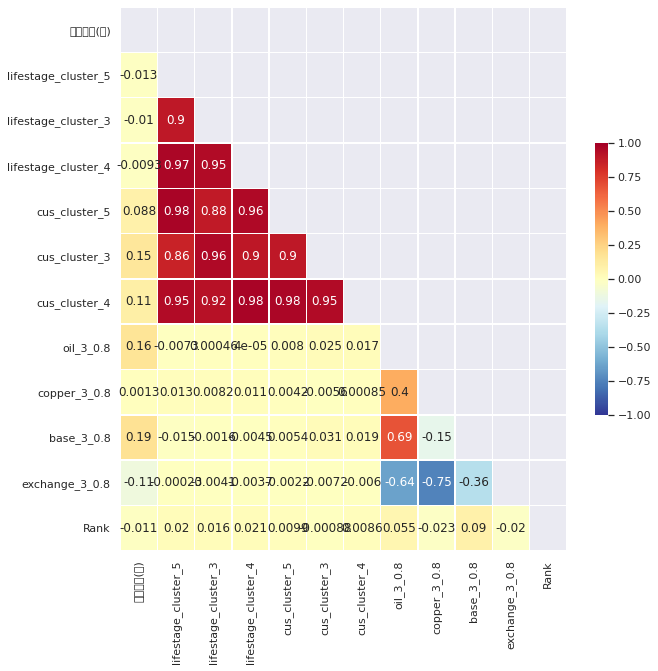

In [71]:
temp = df[['계좌 ID','매수일자', '보유기간(일)','lifestage_cluster_5', 'lifestage_cluster_3', 'lifestage_cluster_4', 'cus_cluster_5',
       'cus_cluster_3', 'cus_cluster_4','oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8','Rank']]

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(temp.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(temp.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           ) 
sns.set(font= 'AppleGothic.ttf')
plt.show()

# 월,일 클러스터링

In [75]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '매수_월', '매수_일',
       '매도_년', '매도_월', '매도_일', '투자성향', '서비스 등급', '총 투자기간',
       'lifestage_cluster_5', 'lifestage_cluster_3', 'lifestage_cluster_4',
       '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수', 'cus_cluster_5',
       'cus_cluster_3', 'cus_cluster_4'],
      dtype='object')

In [76]:
from tqdm import tqdm
mon_list = sorted(set(df['매수_월']))
tmp1 = pd.DataFrame(columns=num_list)
for i in tqdm(mon_list):
    tmp2 = df[df['매수_월']==i]
    tmp1.loc[:,i] = tmp2.T.loc['보유기간(일)'].reset_index(drop=True).astype(float)
    corr2 = tmp1.corr()

100%|██████████| 12/12 [02:40<00:00, 13.40s/it]


In [77]:
corr2

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1.0,1.000000,0.005939,-0.010300,-0.003074,0.009138,-0.004707,0.001808,-0.002838,0.007850,-0.000726,-0.000471,-0.004766
2.0,0.005939,1.000000,-0.009150,0.000769,-0.006574,0.008396,-0.003004,0.000368,0.001572,-0.004925,0.000813,0.008742
3.0,-0.010300,-0.009150,1.000000,0.000706,0.005726,0.000855,0.004122,0.006191,0.003855,-0.003961,0.000353,-0.006475
4.0,-0.003074,0.000769,0.000706,1.000000,0.021034,0.009984,0.005932,0.003115,-0.001560,0.002463,0.004749,0.000019
5.0,0.009138,-0.006574,0.005726,0.021034,1.000000,0.005314,0.008409,0.014858,0.002155,0.006137,-0.006275,0.010587
6.0,-0.004707,0.008396,0.000855,0.009984,0.005314,1.000000,0.000037,0.021541,0.012002,-0.002728,0.000834,-0.001370
7.0,0.001808,-0.003004,0.004122,0.005932,0.008409,0.000037,1.000000,0.003503,0.002162,0.001332,-0.000514,-0.005957
8.0,-0.002838,0.000368,0.006191,0.003115,0.014858,0.021541,0.003503,1.000000,-0.000708,0.004489,-0.004557,0.006036
9.0,0.007850,0.001572,0.003855,-0.001560,0.002155,0.012002,0.002162,-0.000708,1.000000,-0.002852,-0.001902,0.001732
10.0,-0.000726,-0.004925,-0.003961,0.002463,0.006137,-0.002728,0.001332,0.004489,-0.002852,1.000000,0.004080,0.006075


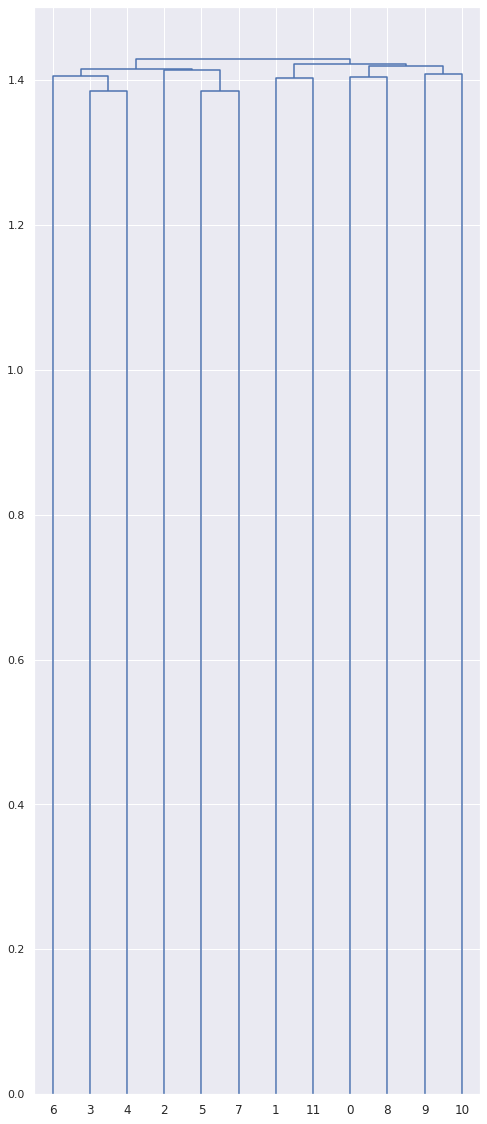

In [78]:
plt.figure(figsize=(8,20))
dend=sch.dendrogram(sch.linkage(corr2,method='complete'))

In [80]:
sch.fcluster(sch.linkage(corr2 ,method='complete'),2, criterion='maxclust')

array([2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2], dtype=int32)

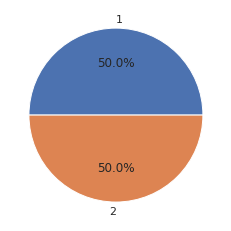

In [81]:
data = [6,6]
labels= ['1','2']
plt.pie(data,labels=labels, autopct='%.1f%%')
plt.show()

In [84]:
# 상관계수 바탕으로 클러스터링 ##5개
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
pdist = sch.distance.pdist(corr.values)
clust=pd.DataFrame(sch.fcluster(sch.linkage(corr2 ,method='complete'), 2, criterion='maxclust'))
clust.columns = ['buy_month_cluster']
clust['buy_month'] = sorted(mon_list)
clust

,buy_month_cluster,buy_month
0,2,1
1,2,2
2,1,3
3,1,4
4,1,5
5,1,6
6,1,7
7,1,8
8,2,9
9,2,10


In [85]:
# 카드 클러스터링 결과 정리
mon_cl_dict = {}
for i in set(clust['buy_month_cluster']):
    mon_cl_dict[i] = clust[clust['buy_month_cluster']==i]['buy_month'].values.tolist()
mon_cl_dict

{1: [3, 4, 5, 6, 7, 8], 2: [1, 2, 9, 10, 11, 12]}

In [86]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '매수_월', '매수_일',
       '매도_년', '매도_월', '매도_일', '투자성향', '서비스 등급', '총 투자기간',
       'lifestage_cluster_5', 'lifestage_cluster_3', 'lifestage_cluster_4',
       '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수', 'cus_cluster_5',
       'cus_cluster_3', 'cus_cluster_4'],
      dtype='object')

In [87]:
df.loc[(df['매수_월']==3) ,'매수월_cluster'] =1
df.loc[(df['매수_월']==4) ,'매수월_cluster'] =1
df.loc[(df['매수_월']==5) ,'매수월_cluster'] =1
df.loc[(df['매수_월']==6) ,'매수월_cluster'] =1
df.loc[(df['매수_월']==7) ,'매수월_cluster'] =1
df.loc[(df['매수_월']==8) ,'매수월_cluster'] =1

df.loc[(df['매수_월']==1) ,'매수월_cluster'] =2
df.loc[(df['매수_월']==2) ,'매수월_cluster'] =2
df.loc[(df['매수_월']==9) ,'매수월_cluster'] =2
df.loc[(df['매수_월']==10) ,'매수월_cluster'] =2
df.loc[(df['매수_월']==11) ,'매수월_cluster'] =2
df.loc[(df['매수_월']==12) ,'매수월_cluster'] =2

In [88]:
from tqdm import tqdm
mon_list = sorted(set(df['매수_일']))
tmp1 = pd.DataFrame(columns=num_list)
for i in tqdm(mon_list):
    tmp2 = df[df['매수_일']==i]
    tmp1.loc[:,i] = tmp2.T.loc['보유기간(일)'].reset_index(drop=True).astype(float)
    corr3 = tmp1.corr()

100%|██████████| 31/31 [02:34<00:00,  4.98s/it]


In [89]:
corr3

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
1.0,1.000000,-0.002025,0.019984,0.010284,0.000647,-0.008304,-0.002076,0.009077,0.011438,-0.003544,...,-0.011339,0.000607,-0.004469,0.009235,0.004165,0.018215,-0.002560,0.016874,-0.011071,-0.006871
2.0,-0.002025,1.000000,0.003909,0.023514,0.002499,-0.002330,0.007207,0.012797,0.008246,0.010865,...,0.010915,-0.012508,-0.000334,-0.010187,-0.000258,0.025364,0.007759,-0.000220,0.011401,-0.011033
3.0,0.019984,0.003909,1.000000,0.017433,0.004618,0.004008,-0.007430,0.003460,0.011076,0.018226,...,-0.001493,0.014663,0.001615,0.000064,-0.011692,0.012481,0.013986,0.003117,-0.005841,0.021876
4.0,0.010284,0.023514,0.017433,1.000000,-0.007153,0.012803,0.015918,0.012482,0.004186,0.000246,...,-0.008626,0.006507,0.011075,0.001129,0.008487,0.015837,0.011833,0.013476,-0.003815,0.018725
5.0,0.000647,0.002499,0.004618,-0.007153,1.000000,0.021860,-0.001290,0.010729,-0.009513,0.003086,...,-0.009379,0.008489,-0.016162,0.007368,0.005565,0.004604,0.001714,-0.003318,-0.004149,-0.009424
6.0,-0.008304,-0.002330,0.004008,0.012803,0.021860,1.000000,-0.000456,-0.004610,-0.001319,0.014284,...,0.018885,0.010012,0.006848,-0.000361,-0.000791,-0.000734,-0.001069,0.021771,0.004398,0.027613
7.0,-0.002076,0.007207,-0.007430,0.015918,-0.001290,-0.000456,1.000000,0.024986,0.004481,0.000858,...,-0.003370,0.002001,0.003229,0.007103,-0.000304,-0.002081,0.000425,-0.000164,0.003873,0.001392
8.0,0.009077,0.012797,0.003460,0.012482,0.010729,-0.004610,0.024986,1.000000,0.022188,-0.012795,...,0.000077,0.002615,-0.005684,0.015395,-0.001512,0.007826,-0.006411,-0.000747,0.003888,-0.001678
9.0,0.011438,0.008246,0.011076,0.004186,-0.009513,-0.001319,0.004481,0.022188,1.000000,-0.004272,...,-0.006984,-0.011545,0.015865,0.009074,0.020277,0.010695,-0.005517,-0.013537,-0.004515,-0.008337
10.0,-0.003544,0.010865,0.018226,0.000246,0.003086,0.014284,0.000858,-0.012795,-0.004272,1.000000,...,-0.002909,-0.010990,-0.005951,0.002137,-0.002570,-0.004943,0.002666,0.004134,-0.007062,0.018908


findfont: Font family ['AppleGothic.ttf'] not found. Falling back to DejaVu Sans.


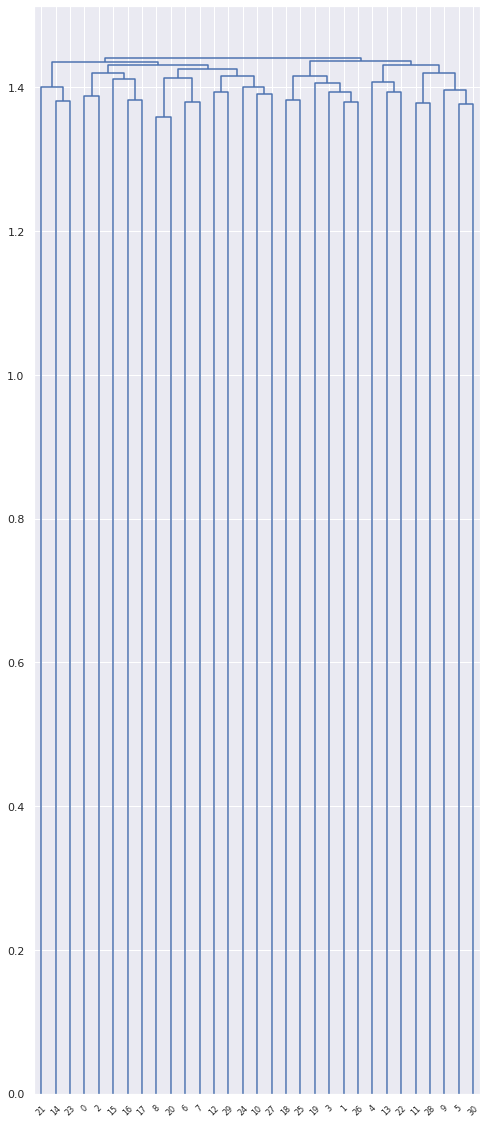

In [90]:
plt.figure(figsize=(8,20))
dend=sch.dendrogram(sch.linkage(corr3,method='complete'))

In [92]:
sch.fcluster(sch.linkage(corr3 ,method='complete'),3, criterion='maxclust')

array([1, 2, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1,
       3, 1, 1, 2, 2, 1, 3, 1, 3], dtype=int32)

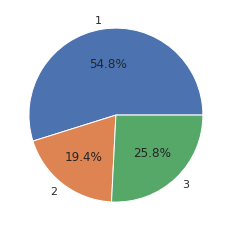

In [93]:
data = [17,6,8]
labels= ['1','2','3']
plt.pie(data,labels=labels, autopct='%.1f%%')
plt.show()

In [97]:
# 상관계수 바탕으로 클러스터링 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
pdist = sch.distance.pdist(corr.values)
clust=pd.DataFrame(sch.fcluster(sch.linkage(corr3 ,method='complete'), 3, criterion='maxclust'))
clust.columns = ['buy_day_cluster']
clust['buy_day'] = sorted(mon_list)
clust

,buy_day_cluster,buy_day
0,1,1
1,2,2
2,1,3
3,2,4
4,3,5
5,3,6
6,1,7
7,1,8
8,1,9
9,3,10


In [98]:
# 카드 클러스터링 결과 정리
day_cl_dict = {}
for i in set(clust['buy_day_cluster']):
    day_cl_dict[i] = clust[clust['buy_day_cluster']==i]['buy_day'].values.tolist()
day_cl_dict

{1: [1, 3, 7, 8, 9, 11, 13, 15, 16, 17, 18, 21, 22, 24, 25, 28, 30],
 2: [2, 4, 19, 20, 26, 27],
 3: [5, 6, 10, 12, 14, 23, 29, 31]}

In [86]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '매수_월', '매수_일',
       '매도_년', '매도_월', '매도_일', '투자성향', '서비스 등급', '총 투자기간',
       'lifestage_cluster_5', 'lifestage_cluster_3', 'lifestage_cluster_4',
       '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수', 'cus_cluster_5',
       'cus_cluster_3', 'cus_cluster_4'],
      dtype='object')

In [99]:
df.loc[(df['매수_일']==1) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==3) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==7) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==8) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==9) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==11) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==13) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==15) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==16) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==17) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==18) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==21) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==22) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==24) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==25) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==28) ,'매수일_cluster'] =1
df.loc[(df['매수_일']==30) ,'매수일_cluster'] =1

df.loc[(df['매수_일']==2) ,'매수일_cluster'] =2
df.loc[(df['매수_일']==4) ,'매수일_cluster'] =2
df.loc[(df['매수_일']==19) ,'매수일_cluster'] =2
df.loc[(df['매수_일']==20) ,'매수일_cluster'] =2
df.loc[(df['매수_일']==26) ,'매수일_cluster'] =2
df.loc[(df['매수_일']==27) ,'매수일_cluster'] =2

df.loc[(df['매수_일']==5) ,'매수일_cluster'] =3
df.loc[(df['매수_일']==6) ,'매수일_cluster'] =3
df.loc[(df['매수_일']==10) ,'매수일_cluster'] =3
df.loc[(df['매수_일']==12) ,'매수일_cluster'] =3
df.loc[(df['매수_일']==14) ,'매수일_cluster'] =3
df.loc[(df['매수_일']==23) ,'매수일_cluster'] =3
df.loc[(df['매수_일']==29) ,'매수일_cluster'] =3
df.loc[(df['매수_일']==31) ,'매수일_cluster'] =3

In [101]:
from tqdm import tqdm
mon_list = sorted(set(df['매도_월']))
tmp1 = pd.DataFrame(columns=num_list)
for i in tqdm(mon_list):
    tmp2 = df[df['매도_월']==i]
    tmp1.loc[:,i] = tmp2.T.loc['보유기간(일)'].reset_index(drop=True).astype(float)
    corr4 = tmp1.corr()

100%|██████████| 12/12 [02:39<00:00, 13.27s/it]


In [102]:
corr4

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1.0,1.000000,0.003988,0.005913,-0.002260,-0.001093,0.013356,0.001858,0.001269,-0.001374,-0.000635,0.002273,-0.005550
2.0,0.003988,1.000000,-0.006012,-0.003682,-0.002610,0.002263,0.006673,-0.008967,-0.003076,0.001056,0.001974,0.014074
3.0,0.005913,-0.006012,1.000000,0.003242,-0.012342,0.001394,-0.003225,0.006518,-0.003082,-0.008526,0.002407,0.001180
4.0,-0.002260,-0.003682,0.003242,1.000000,0.004906,-0.006838,0.002328,-0.006299,0.001936,0.009709,-0.005192,0.004332
5.0,-0.001093,-0.002610,-0.012342,0.004906,1.000000,-0.003553,0.004938,-0.000843,-0.001983,0.000088,0.000729,-0.000964
6.0,0.013356,0.002263,0.001394,-0.006838,-0.003553,1.000000,0.002810,-0.007795,0.008334,0.005106,0.005560,-0.000321
7.0,0.001858,0.006673,-0.003225,0.002328,0.004938,0.002810,1.000000,0.003382,0.009224,0.007142,0.014968,0.003007
8.0,0.001269,-0.008967,0.006518,-0.006299,-0.000843,-0.007795,0.003382,1.000000,-0.000315,0.004590,-0.002595,0.015429
9.0,-0.001374,-0.003076,-0.003082,0.001936,-0.001983,0.008334,0.009224,-0.000315,1.000000,0.011388,0.011309,0.006657
10.0,-0.000635,0.001056,-0.008526,0.009709,0.000088,0.005106,0.007142,0.004590,0.011388,1.000000,0.000503,-0.001850


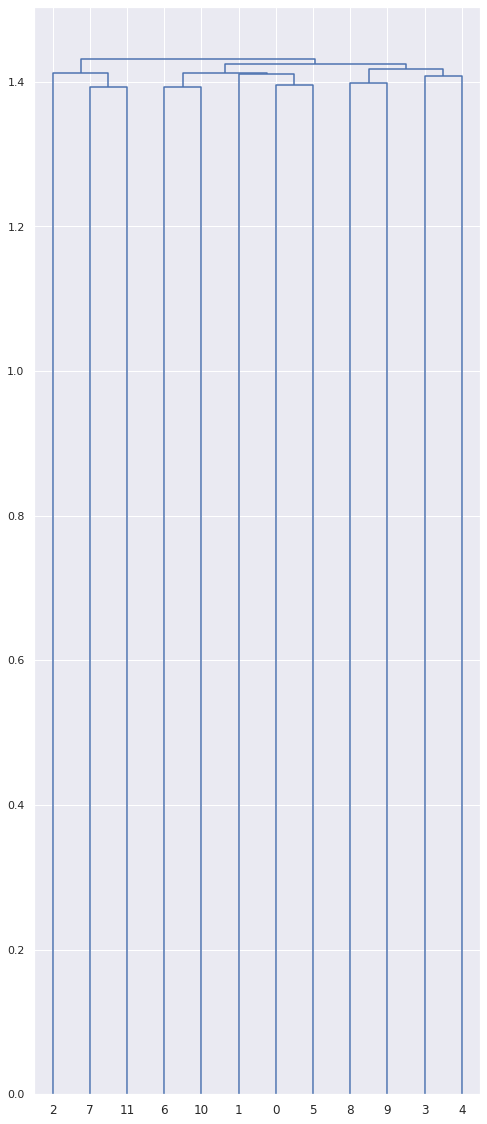

In [103]:
plt.figure(figsize=(8,20))
dend=sch.dendrogram(sch.linkage(corr4,method='complete'))

In [104]:
sch.fcluster(sch.linkage(corr4 ,method='complete'),2, criterion='maxclust')

array([2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1], dtype=int32)

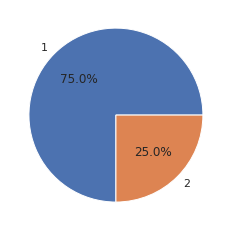

In [105]:
data = [9,3]
labels= ['1','2']
plt.pie(data,labels=labels, autopct='%.1f%%')
plt.show()

In [106]:
# 상관계수 바탕으로 클러스터링 ##5개
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
pdist = sch.distance.pdist(corr.values)
clust=pd.DataFrame(sch.fcluster(sch.linkage(corr4 ,method='complete'), 2, criterion='maxclust'))
clust.columns = ['sell_month_cluster']
clust['sell_month'] = sorted(mon_list)
clust

,sell_month_cluster,sell_month
0,2,1.0
1,2,2.0
2,1,3.0
3,2,4.0
4,2,5.0
5,2,6.0
6,2,7.0
7,1,8.0
8,2,9.0
9,2,10.0


In [107]:
# 카드 클러스터링 결과 정리
mon_cl_dict = {}
for i in set(clust['sell_month_cluster']):
    mon_cl_dict[i] = clust[clust['sell_month_cluster']==i]['sell_month'].values.tolist()
mon_cl_dict

{1: [3.0, 8.0, 12.0], 2: [1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0]}

In [86]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '매수_월', '매수_일',
       '매도_년', '매도_월', '매도_일', '투자성향', '서비스 등급', '총 투자기간',
       'lifestage_cluster_5', 'lifestage_cluster_3', 'lifestage_cluster_4',
       '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수', 'cus_cluster_5',
       'cus_cluster_3', 'cus_cluster_4'],
      dtype='object')

In [108]:
df.loc[(df['매도_월']==3) ,'매도월_cluster'] =1
df.loc[(df['매도_월']==8) ,'매도월_cluster'] =1
df.loc[(df['매도_월']==12) ,'매도월_cluster'] =1

df.loc[(df['매도_월']==1) ,'매도월_cluster'] =2
df.loc[(df['매도_월']==2) ,'매도월_cluster'] =2
df.loc[(df['매도_월']==4) ,'매도월_cluster'] =2
df.loc[(df['매도_월']==5) ,'매도월_cluster'] =2
df.loc[(df['매도_월']==6) ,'매도월_cluster'] =2
df.loc[(df['매도_월']==7) ,'매도월_cluster'] =2
df.loc[(df['매도_월']==9) ,'매도월_cluster'] =2
df.loc[(df['매도_월']==10) ,'매도월_cluster'] =2
df.loc[(df['매도_월']==11) ,'매도월_cluster'] =2

In [109]:
from tqdm import tqdm
mon_list = sorted(set(df['매도_일']))
tmp1 = pd.DataFrame(columns=num_list)
for i in tqdm(mon_list):
    tmp2 = df[df['매도_일']==i]
    tmp1.loc[:,i] = tmp2.T.loc['보유기간(일)'].reset_index(drop=True).astype(float)
    corr5 = tmp1.corr()

100%|██████████| 31/31 [02:39<00:00,  5.14s/it]


In [102]:
corr5

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
1.0,1.000000,0.003988,0.005913,-0.002260,-0.001093,0.013356,0.001858,0.001269,-0.001374,-0.000635,0.002273,-0.005550
2.0,0.003988,1.000000,-0.006012,-0.003682,-0.002610,0.002263,0.006673,-0.008967,-0.003076,0.001056,0.001974,0.014074
3.0,0.005913,-0.006012,1.000000,0.003242,-0.012342,0.001394,-0.003225,0.006518,-0.003082,-0.008526,0.002407,0.001180
4.0,-0.002260,-0.003682,0.003242,1.000000,0.004906,-0.006838,0.002328,-0.006299,0.001936,0.009709,-0.005192,0.004332
5.0,-0.001093,-0.002610,-0.012342,0.004906,1.000000,-0.003553,0.004938,-0.000843,-0.001983,0.000088,0.000729,-0.000964
6.0,0.013356,0.002263,0.001394,-0.006838,-0.003553,1.000000,0.002810,-0.007795,0.008334,0.005106,0.005560,-0.000321
7.0,0.001858,0.006673,-0.003225,0.002328,0.004938,0.002810,1.000000,0.003382,0.009224,0.007142,0.014968,0.003007
8.0,0.001269,-0.008967,0.006518,-0.006299,-0.000843,-0.007795,0.003382,1.000000,-0.000315,0.004590,-0.002595,0.015429
9.0,-0.001374,-0.003076,-0.003082,0.001936,-0.001983,0.008334,0.009224,-0.000315,1.000000,0.011388,0.011309,0.006657
10.0,-0.000635,0.001056,-0.008526,0.009709,0.000088,0.005106,0.007142,0.004590,0.011388,1.000000,0.000503,-0.001850


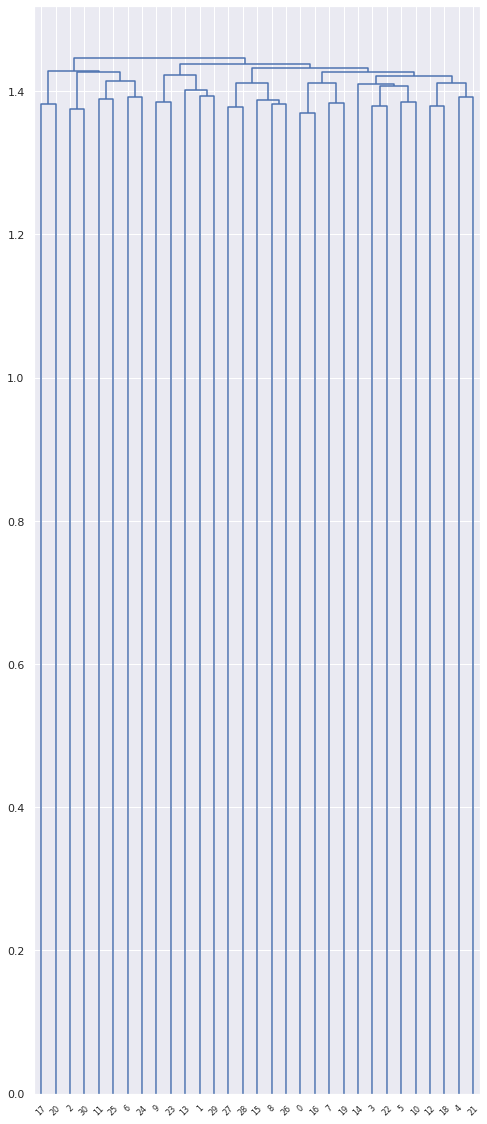

In [110]:
plt.figure(figsize=(8,20))
dend=sch.dendrogram(sch.linkage(corr5,method='complete'))

In [111]:
sch.fcluster(sch.linkage(corr5 ,method='complete'),3, criterion='maxclust')

array([3, 2, 1, 3, 3, 3, 1, 3, 3, 2, 3, 1, 3, 2, 3, 3, 3, 1, 3, 3, 1, 3,
       3, 2, 1, 1, 3, 3, 3, 2, 1], dtype=int32)

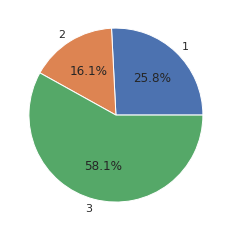

In [112]:
data = [8,5,18]
labels= ['1','2','3']
plt.pie(data,labels=labels, autopct='%.1f%%')
plt.show()

In [116]:
# 상관계수 바탕으로 클러스터링
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
pdist = sch.distance.pdist(corr.values)
clust=pd.DataFrame(sch.fcluster(sch.linkage(corr5 ,method='complete'), 3, criterion='maxclust'))
clust.columns = ['sell_day_cluster']
clust['sell_day'] = sorted(mon_list)
clust

,sell_day_cluster,sell_day
0,3,1.0
1,2,2.0
2,1,3.0
3,3,4.0
4,3,5.0
5,3,6.0
6,1,7.0
7,3,8.0
8,3,9.0
9,2,10.0


In [117]:
# 카드 클러스터링 결과 정리
day_cl_dict = {}
for i in set(clust['sell_day_cluster']):
    day_cl_dict[i] = clust[clust['sell_day_cluster']==i]['sell_day'].values.tolist()
day_cl_dict

{1: [3.0, 7.0, 12.0, 18.0, 21.0, 25.0, 26.0, 31.0],
 2: [2.0, 10.0, 14.0, 24.0, 30.0],
 3: [1.0,
  4.0,
  5.0,
  6.0,
  8.0,
  9.0,
  11.0,
  13.0,
  15.0,
  16.0,
  17.0,
  19.0,
  20.0,
  22.0,
  23.0,
  27.0,
  28.0,
  29.0]}

In [118]:
df.loc[(df['매도_일']==3) ,'매도일_cluster'] =1
df.loc[(df['매도_일']==7) ,'매도일_cluster'] =1
df.loc[(df['매도_일']==12) ,'매도일_cluster'] =1
df.loc[(df['매도_일']==18) ,'매도일_cluster'] =1
df.loc[(df['매도_일']==21) ,'매도일_cluster'] =1
df.loc[(df['매도_일']==25) ,'매도일_cluster'] =1
df.loc[(df['매도_일']==26) ,'매도일_cluster'] =1
df.loc[(df['매도_일']==31) ,'매도일_cluster'] =1

df.loc[(df['매도_일']==2) ,'매도일_cluster'] =2
df.loc[(df['매도_일']==10) ,'매도일_cluster'] =2
df.loc[(df['매도_일']==14) ,'매도일_cluster'] =2
df.loc[(df['매도_일']==24) ,'매도일_cluster'] =2
df.loc[(df['매도_일']==30) ,'매도일_cluster'] =2

df.loc[(df['매도_일']==1) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==4) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==5) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==6) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==8) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==9) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==11) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==13) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==15) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==16) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==17) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==19) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==20) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==22) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==23) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==27) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==28) ,'매도일_cluster'] =3
df.loc[(df['매도_일']==29) ,'매도일_cluster'] =3

In [120]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '매수_월', '매수_일',
       '매도_년', '매도_월', '매도_일', '투자성향', '서비스 등급', '총 투자기간',
       'lifestage_cluster_5', 'lifestage_cluster_3', 'lifestage_cluster_4',
       '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수', 'cus_cluster_5',
       'cus_cluster_3', 'cus_cluster_4', '매수월_cluster', '매수일_cluster',
       '매도월_cluster', '매도일_cluster'],
      dtype='object')

In [123]:
aa= df.drop(['매도_년','매수_월', '매수_일','매도_월', '매도_일','lifestage_cluster_5', 'lifestage_cluster_3', 'lifestage_cluster_4','cus_cluster_4','cus_cluster_5','매수월_cluster', '매수일_cluster',
       '매도월_cluster', '매도일_cluster'], axis=1, inplace=False)
aa.corr()

,보유기간(일),oil_3_0.8,copper_3_0.8,base_3_0.8,exchange_3_0.8,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,cus_cluster_3
보유기간(일),1.000000,0.164186,0.001289,0.186410,-0.108136,-0.011404,-0.193461,0.038292,-0.020935,0.069265,0.018974,-0.023623,-0.021522,0.153183
oil_3_0.8,0.164186,1.000000,0.400314,0.686591,-0.640206,0.054873,-0.667727,0.065473,0.019680,0.237642,-0.039525,0.048609,-0.024506,0.025006
copper_3_0.8,0.001289,0.400314,1.000000,-0.150052,-0.749635,-0.022974,-0.077221,-0.005321,0.025681,-0.038701,-0.024851,-0.003445,0.042119,-0.005635
base_3_0.8,0.186410,0.686591,-0.150052,1.000000,-0.357069,0.089945,-0.739792,0.087476,0.012670,0.320446,-0.027235,0.069302,-0.051567,0.030912
exchange_3_0.8,-0.108136,-0.640206,-0.749635,-0.357069,1.000000,-0.020001,0.552069,-0.042855,-0.028836,-0.166936,0.035000,-0.028784,-0.008060,-0.007158
Rank,-0.011404,0.054873,-0.022974,0.089945,-0.020001,1.000000,-0.042828,0.008863,0.032567,0.008092,0.417670,0.637505,0.086099,-0.000876
매수_년,-0.193461,-0.667727,-0.077221,-0.739792,0.552069,-0.042828,1.000000,-0.078767,-0.010602,-0.366612,0.038696,-0.035257,0.052685,-0.020267
투자성향,0.038292,0.065473,-0.005321,0.087476,-0.042855,0.008863,-0.078767,1.000000,-0.237919,0.232068,0.026509,-0.011661,-0.007670,0.098524
서비스 등급,-0.020935,0.019680,0.025681,0.012670,-0.028836,0.032567,-0.010602,-0.237919,1.000000,-0.255294,-0.004886,0.038022,-0.015097,-0.017288
총 투자기간,0.069265,0.237642,-0.038701,0.320446,-0.166936,0.008092,-0.366612,0.232068,-0.255294,1.000000,-0.016445,-0.004260,-0.013122,0.021277


In [124]:
df2 = pd.read_csv("train1003(2).csv")

In [131]:
df2.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)_x', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8_x', 'exchange_3_0.8', 'Rank_x', '매도일자', '매수_년_x', '종가변화율',
       '전일대비거래량변화', '매도-매수 수익률', '나스닥종가변화율', '국제유가 변화율', '광물가격 변화율', '환율 변화율',
       '경상수지'],
      dtype='object')

In [130]:
df2.drop(['Unnamed: 0','매수_월_x', '매수_일_x', '매도_년_x', '매도_월_x', '매도_일_x'], axis=1, inplace=True)

In [134]:
df2.columns=['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '종가변화율',
       '전일대비거래량변화', '매도-매수 수익률', '나스닥종가변화율', '국제유가 변화율', '광물가격 변화율', '환율 변화율',
       '경상수지']

In [135]:
df2.drop(['국제유가 변화율', '광물가격 변화율','경상수지'], axis=1, inplace=True)

In [136]:
df2.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '종가변화율',
       '전일대비거래량변화', '매도-매수 수익률', '나스닥종가변화율', '환율 변화율'],
      dtype='object')

In [137]:
aa.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '투자성향',
       '서비스 등급', '총 투자기간', '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수',
       'cus_cluster_3'],
      dtype='object')

In [138]:
df3 = pd.merge(aa,df2, on=['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년'], how='outer')

In [141]:
df3.isnull().sum()

계좌 ID                 0
종목코드                  0
매수일자                  0
보유기간(일)               0
oil_3_0.8             0
copper_3_0.8          0
base_3_0.8            0
exchange_3_0.8        0
Rank                  0
매도일자                  0
매수_년                  0
투자성향                  0
서비스 등급                0
총 투자기간                0
종목한글명                 0
시가총액 규모유형             0
시장구분                  0
주거래업종_매수              0
cus_cluster_3         0
종가변화율             14743
전일대비거래량변화         17596
매도-매수 수익률         17274
나스닥종가변화율          20185
환율 변화율                0
dtype: int64

In [142]:
df3.corr()

,보유기간(일),oil_3_0.8,copper_3_0.8,base_3_0.8,exchange_3_0.8,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,cus_cluster_3,종가변화율,전일대비거래량변화,매도-매수 수익률,나스닥종가변화율,환율 변화율
보유기간(일),1.000000,0.164186,0.001289,0.186410,-0.108136,-0.011404,-0.193461,0.038292,-0.020935,0.069265,0.018974,-0.023623,-0.021522,0.153183,-0.059169,-0.000515,-0.029841,-0.017276,0.248867
oil_3_0.8,0.164186,1.000000,0.400314,0.686591,-0.640206,0.054873,-0.667727,0.065473,0.019680,0.237642,-0.039525,0.048609,-0.024506,0.025006,-0.059054,0.000244,-0.067106,-0.053664,0.256835
copper_3_0.8,0.001289,0.400314,1.000000,-0.150052,-0.749635,-0.022974,-0.077221,-0.005321,0.025681,-0.038701,-0.024851,-0.003445,0.042119,-0.005635,0.002644,0.001116,-0.029610,-0.044019,0.024901
base_3_0.8,0.186410,0.686591,-0.150052,1.000000,-0.357069,0.089945,-0.739792,0.087476,0.012670,0.320446,-0.027235,0.069302,-0.051567,0.030912,-0.082814,0.000875,-0.050994,-0.064082,0.326191
exchange_3_0.8,-0.108136,-0.640206,-0.749635,-0.357069,1.000000,-0.020001,0.552069,-0.042855,-0.028836,-0.166936,0.035000,-0.028784,-0.008060,-0.007158,0.040534,-0.001138,0.046318,0.045631,-0.240255
Rank,-0.011404,0.054873,-0.022974,0.089945,-0.020001,1.000000,-0.042828,0.008863,0.032567,0.008092,0.417670,0.637505,0.086099,-0.000876,0.121792,0.005335,0.019931,0.000627,0.042215
매수_년,-0.193461,-0.667727,-0.077221,-0.739792,0.552069,-0.042828,1.000000,-0.078767,-0.010602,-0.366612,0.038696,-0.035257,0.052685,-0.020267,0.072671,-0.003667,0.042108,0.041663,-0.203581
투자성향,0.038292,0.065473,-0.005321,0.087476,-0.042855,0.008863,-0.078767,1.000000,-0.237919,0.232068,0.026509,-0.011661,-0.007670,0.098524,-0.020761,-0.001762,-0.002521,-0.005219,0.030701
서비스 등급,-0.020935,0.019680,0.025681,0.012670,-0.028836,0.032567,-0.010602,-0.237919,1.000000,-0.255294,-0.004886,0.038022,-0.015097,-0.017288,0.033371,0.002337,0.003968,-0.000118,-0.006814
총 투자기간,0.069265,0.237642,-0.038701,0.320446,-0.166936,0.008092,-0.366612,0.232068,-0.255294,1.000000,-0.016445,-0.004260,-0.013122,0.021277,-0.051516,0.001177,-0.017678,-0.020292,0.094413


In [143]:
df3.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', 'oil_3_0.8', 'copper_3_0.8',
       'base_3_0.8', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년', '투자성향',
       '서비스 등급', '총 투자기간', '종목한글명', '시가총액 규모유형', '시장구분', '주거래업종_매수',
       'cus_cluster_3', '종가변화율', '전일대비거래량변화', '매도-매수 수익률', '나스닥종가변화율',
       '환율 변화율'],
      dtype='object')

In [144]:
bb= df3.drop(['종가변화율', '전일대비거래량변화', '매도-매수 수익률', '나스닥종가변화율','copper_3_0.8','exchange_3_0.8'], axis=1, inplace=False)
bb.corr()

,보유기간(일),oil_3_0.8,base_3_0.8,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,cus_cluster_3,환율 변화율
보유기간(일),1.000000,0.164186,0.186410,-0.011404,-0.193461,0.038292,-0.020935,0.069265,0.018974,-0.023623,-0.021522,0.153183,0.248867
oil_3_0.8,0.164186,1.000000,0.686591,0.054873,-0.667727,0.065473,0.019680,0.237642,-0.039525,0.048609,-0.024506,0.025006,0.256835
base_3_0.8,0.186410,0.686591,1.000000,0.089945,-0.739792,0.087476,0.012670,0.320446,-0.027235,0.069302,-0.051567,0.030912,0.326191
Rank,-0.011404,0.054873,0.089945,1.000000,-0.042828,0.008863,0.032567,0.008092,0.417670,0.637505,0.086099,-0.000876,0.042215
매수_년,-0.193461,-0.667727,-0.739792,-0.042828,1.000000,-0.078767,-0.010602,-0.366612,0.038696,-0.035257,0.052685,-0.020267,-0.203581
투자성향,0.038292,0.065473,0.087476,0.008863,-0.078767,1.000000,-0.237919,0.232068,0.026509,-0.011661,-0.007670,0.098524,0.030701
서비스 등급,-0.020935,0.019680,0.012670,0.032567,-0.010602,-0.237919,1.000000,-0.255294,-0.004886,0.038022,-0.015097,-0.017288,-0.006814
총 투자기간,0.069265,0.237642,0.320446,0.008092,-0.366612,0.232068,-0.255294,1.000000,-0.016445,-0.004260,-0.013122,0.021277,0.094413
시가총액 규모유형,0.018974,-0.039525,-0.027235,0.417670,0.038696,0.026509,-0.004886,-0.016445,1.000000,0.198957,0.002771,0.016459,0.001004
시장구분,-0.023623,0.048609,0.069302,0.637505,-0.035257,-0.011661,0.038022,-0.004260,0.198957,1.000000,0.071961,-0.012528,0.035915


In [148]:
bb.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', '국제유가_매수', '기준금리_매수', 'Rank',
       '매도일자', '매수_년', '투자성향', '서비스 등급', '총 투자기간', '종목한글명', '시가총액 규모유형',
       '시장구분', '주거래업종_매수', 'cus_cluster_3', '환율 변화율'],
      dtype='object')

In [ ]:
test cus, iem

In [147]:
bb.rename(columns={'oil_3_0.8':'국제유가_매수','base_3_0.8':'기준금리_매수'},inplace=True)

In [150]:
past = pd.read_csv("past_id와 횟수.csv")

In [152]:
past.drop(['Unnamed: 0'], axis=1, inplace=True)

In [153]:
cc = pd.merge(bb, past, on='계좌 ID')

In [155]:
cc.isnull().sum()

계좌 ID            0
종목코드             0
매수일자             0
보유기간(일)          0
국제유가_매수          0
기준금리_매수          0
Rank             0
매도일자             0
매수_년             0
투자성향             0
서비스 등급           0
총 투자기간           0
종목한글명            0
시가총액 규모유형        0
시장구분             0
주거래업종_매수         0
cus_cluster_3    0
환율 변화율           0
past_id          0
거래 횟수            0
dtype: int64

In [156]:
cc.to_csv("train_1003(merge완료).csv", header=True, index=False, encoding='cp949')

# test

In [162]:
# 고객 및 주거래계좌 정보(CUS_INFO.CSV)
cus = pd.read_csv('cus_info_new.csv', encoding='cp949')

# 종목정보(IEM_INFO.CSV)
iem= pd.read_csv('iem_info_20210902.csv')

# 국내주식 잔고이력(STK_BNC_HIST.CSV) _ 잔고정보 (국내 주식건에 한해) <- 여기세 종목 정보 들어있음
hist = pd.read_csv('stk_bnc_hist.csv')

# 국내주식 보유기간(STK_HLD_.CSV)
test = pd.read_csv('test_0926.csv', encoding='cp949')
train = pd.read_csv('train_매도일추가.csv')

# submission file
submission = pd.read_csv('sample_submission.csv')

In [163]:
cus.columns=["계좌 ID","성별","연령대","투자성향","자산구간","주거래상품군","Life Style","서비스 등급","총 투자기간","주거래업종구분"]
iem.columns= ["종목코드","종목한글명","종목업종", "시가총액 규모유형","시장구분"]
hist.columns= ["계좌 ID","기준일자","종목코드","잔고수량","잔고금액","주당 액면가"]

In [164]:
import warnings
warnings.filterwarnings(action='ignore')

In [165]:
cus['LifeStyle_new']= np.nan

In [166]:
cus.loc[(cus['성별']==1) & (cus['연령대']==1) & (cus['Life Style']==2),'LifeStyle_new'] = 1
cus.loc[(cus['성별']==2) & (cus['연령대']==1) & (cus['Life Style']==2),'LifeStyle_new'] = 2
cus.loc[(cus['성별']==1) & (cus['연령대']==2) & (cus['Life Style']==2),'LifeStyle_new'] = 3
cus.loc[(cus['성별']==2) & (cus['연령대']==2) & (cus['Life Style']==2),'LifeStyle_new'] = 4

cus.loc[(cus['성별']==1) & (cus['연령대']==3) & (cus['Life Style']==3),'LifeStyle_new'] = 5
cus.loc[(cus['성별']==2) & (cus['연령대']==3) & (cus['Life Style']==4),'LifeStyle_new'] = 6
cus.loc[(cus['성별']==1) & (cus['연령대']==4) & (cus['Life Style']==3),'LifeStyle_new'] = 7
cus.loc[(cus['성별']==2) & (cus['연령대']==4) & (cus['Life Style']==4),'LifeStyle_new'] = 8

cus.loc[(cus['성별']==1) & (cus['연령대']==5) & (cus['Life Style']==5),'LifeStyle_new'] = 9
cus.loc[(cus['성별']==2) & (cus['연령대']==5) & (cus['Life Style']==6),'LifeStyle_new'] = 10

cus.loc[(cus['성별']==1) & (cus['연령대']==6) & (cus['Life Style']==5),'LifeStyle_new'] = 11
cus.loc[(cus['성별']==2) & (cus['연령대']==6) & (cus['Life Style']==6),'LifeStyle_new'] = 12
cus.loc[(cus['성별']==1) & (cus['연령대']==7) & (cus['Life Style']==5),'LifeStyle_new'] = 13
cus.loc[(cus['성별']==2) & (cus['연령대']==7) & (cus['Life Style']==6),'LifeStyle_new'] = 14
cus.loc[(cus['성별']==1) & (cus['연령대']==8) & (cus['Life Style']==5),'LifeStyle_new'] = 15
cus.loc[(cus['성별']==2) & (cus['연령대']==8) & (cus['Life Style']==6),'LifeStyle_new'] = 16

cus.loc[(cus['성별']==1) & (cus['연령대']==5) & (cus['Life Style']==7),'LifeStyle_new'] = 17
cus.loc[(cus['성별']==2) & (cus['연령대']==5) & (cus['Life Style']==8),'LifeStyle_new'] = 18
cus.loc[(cus['성별']==1) & (cus['연령대']==6) & (cus['Life Style']==7),'LifeStyle_new'] = 19
cus.loc[(cus['성별']==2) & (cus['연령대']==6) & (cus['Life Style']==8),'LifeStyle_new'] = 20
cus.loc[(cus['성별']==1) & (cus['연령대']==7) & (cus['Life Style']==7),'LifeStyle_new'] = 21
cus.loc[(cus['성별']==2) & (cus['연령대']==7) & (cus['Life Style']==8),'LifeStyle_new'] = 22
cus.loc[(cus['성별']==1) & (cus['연령대']==8) & (cus['Life Style']==7),'LifeStyle_new'] = 23
cus.loc[(cus['성별']==2) & (cus['연령대']==8) & (cus['Life Style']==8),'LifeStyle_new'] = 24

cus.loc[(cus['성별']==1) & (cus['연령대']==9) & (cus['Life Style']==9),'LifeStyle_new'] = 25
cus.loc[(cus['성별']==2) & (cus['연령대']==9) & (cus['Life Style']==9),'LifeStyle_new'] = 26

In [167]:
cus['LifeStyle_new']=cus['LifeStyle_new'].fillna(99)

In [173]:
cus['lifestage_cluster_3']= np.nan

In [174]:
cus.loc[(cus['LifeStyle_new']==1),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==4),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==13),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==17),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==21),'lifestage_cluster_3'] =1
cus.loc[(cus['LifeStyle_new']==99),'lifestage_cluster_3'] =1

cus.loc[(cus['LifeStyle_new']==6),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==8),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==11),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==14),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==19),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==23),'lifestage_cluster_3'] =2
cus.loc[(cus['LifeStyle_new']==24),'lifestage_cluster_3'] =2

cus.loc[(cus['LifeStyle_new']==5),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==15),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==18),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==25),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==26),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==7),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==9),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==16),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==20),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==2),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==3),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==10),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==12),'lifestage_cluster_3'] =3
cus.loc[(cus['LifeStyle_new']==22),'lifestage_cluster_3'] =3

In [175]:
cus.columns

Index(['계좌 ID', '성별', '연령대', '투자성향', '자산구간', '주거래상품군', 'Life Style', '서비스 등급',
       '총 투자기간', '주거래업종구분', 'LifeStyle_new', 'lifestage_cluster_3'],
      dtype='object')

In [176]:
cus.drop(['성별', '연령대','Life Style','LifeStyle_new','주거래상품군','자산구간'], axis=1, inplace=True)

In [177]:
# df는 cus, iem, train merge
df = pd.merge(test, cus,on=['계좌 ID'])
df = pd.merge(df, iem, on=['종목코드'])

In [178]:
df['주거래업종_매수']= np.nan

df.loc[df['주거래업종구분']== df['종목업종'],'주거래업종_매수' ] = 1
df.loc[df['주거래업종구분']== 15 ,'주거래업종_매수' ] = 1
df.loc[df['주거래업종구분']!= df['종목업종'],'주거래업종_매수' ] = 0
df.loc[df['주거래업종구분']== 16 ,'주거래업종_매수' ] = 0

In [179]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '과거 보유일', '제출ID', '보유기간(일)', 'oil_3_0.8',
       'copper_3_0.8', 'base_3_0.8', 'exchange_3_0.8', 'Rank', '투자성향',
       '서비스 등급', '총 투자기간', '주거래업종구분', 'lifestage_cluster_3', '종목한글명', '종목업종',
       '시가총액 규모유형', '시장구분', '주거래업종_매수'],
      dtype='object')

In [180]:
df.drop(['주거래업종구분','종목업종'], axis=1, inplace=True)

In [183]:
df['과거 보유일'].quantile(0.25)

14.0

In [184]:
df['과거 보유일'].quantile(0.5)

56.0

In [185]:
df['과거 보유일'].quantile(0.75)

131.0

In [187]:
df['과거 보유일'].quantile(0.95)

530.0

In [188]:
df['cus_cluster_3']=np.nan

In [195]:
df.loc[(df['lifestage_cluster_3']==1)& (df['과거 보유일']<15) ,'cus_cluster_3'] =1
df.loc[(df['lifestage_cluster_3']==1)& (df['과거 보유일']>14)& (df['과거 보유일']<57) ,'cus_cluster_3'] =2
df.loc[(df['lifestage_cluster_3']==1)& (df['과거 보유일']>56)& (df['과거 보유일']<132),'cus_cluster_3'] =3
df.loc[(df['lifestage_cluster_3']==1)& (df['과거 보유일']>131)& (df['과거 보유일']<531) ,'cus_cluster_3'] =4
df.loc[(df['lifestage_cluster_3']==1)& (df['과거 보유일']>530) ,'cus_cluster_3'] =5

df.loc[(df['lifestage_cluster_3']==2)& (df['과거 보유일']<15) ,'cus_cluster_3'] =6
df.loc[(df['lifestage_cluster_3']==2)& (df['과거 보유일']>14)& (df['과거 보유일']<57) ,'cus_cluster_3'] =7
df.loc[(df['lifestage_cluster_3']==2)& (df['과거 보유일']>56)& (df['과거 보유일']<132),'cus_cluster_3'] =8
df.loc[(df['lifestage_cluster_3']==2)& (df['과거 보유일']>131)& (df['과거 보유일']<531) ,'cus_cluster_3'] =9
df.loc[(df['lifestage_cluster_3']==2)& (df['과거 보유일']>530) ,'cus_cluster_3'] =10

df.loc[(df['lifestage_cluster_3']==3)& (df['과거 보유일']<15) ,'cus_cluster_3'] =11
df.loc[(df['lifestage_cluster_3']==3)& (df['과거 보유일']>14)& (df['과거 보유일']<57) ,'cus_cluster_3'] =12
df.loc[(df['lifestage_cluster_3']==3)& (df['과거 보유일']>56)& (df['과거 보유일']<132),'cus_cluster_3'] =13
df.loc[(df['lifestage_cluster_3']==3)& (df['과거 보유일']>131)& (df['과거 보유일']<531) ,'cus_cluster_3'] =14
df.loc[(df['lifestage_cluster_3']==3)& (df['과거 보유일']>530) ,'cus_cluster_3'] =15


In [196]:
df.isnull().sum()

계좌 ID                  0
종목코드                   0
매수일자                   0
과거 보유일                 0
제출ID                   0
보유기간(일)                0
oil_3_0.8              0
copper_3_0.8           0
base_3_0.8             0
exchange_3_0.8         0
Rank                   0
투자성향                   0
서비스 등급                 0
총 투자기간                 0
lifestage_cluster_3    0
종목한글명                  0
시가총액 규모유형              0
시장구분                   0
주거래업종_매수               0
cus_cluster_3          0
dtype: int64

In [200]:
df.rename(columns={'oil_3_0.8':'국제유가_매수','base_3_0.8':'기준금리_매수'},inplace=True)

In [206]:
df.columns

Index(['계좌 ID', '종목코드', '매수일자', '과거 보유일', '제출ID', '보유기간(일)', '국제유가_매수',
       'copper_3_0.8', '기준금리_매수', 'exchange_3_0.8', 'Rank', '투자성향', '서비스 등급',
       '총 투자기간', 'lifestage_cluster_3', '종목한글명', '시가총액 규모유형', '시장구분',
       '주거래업종_매수', 'cus_cluster_3', '매수_년'],
      dtype='object')

In [203]:
df[['매수일자']].head(1)

,매수일자
0,2020-05-22


In [204]:
df['매수일자']= df['매수일자'].astype(str)
df['매수_년'] = df['매수일자'].apply(lambda x : str(x[0:4]))

In [207]:
dd = df.drop(['copper_3_0.8','exchange_3_0.8','lifestage_cluster_3'], axis=1, inplace=False)

In [198]:
cc.columns #train

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', '국제유가_매수', '기준금리_매수', 'Rank',
       '매도일자', '매수_년', '투자성향', '서비스 등급', '총 투자기간', '종목한글명', '시가총액 규모유형',
       '시장구분', '주거래업종_매수', 'cus_cluster_3', '환율 변화율', 'past_id', '거래 횟수'],
      dtype='object')

In [208]:
dd.columns

Index(['계좌 ID', '종목코드', '매수일자', '과거 보유일', '제출ID', '보유기간(일)', '국제유가_매수',
       '기준금리_매수', 'Rank', '투자성향', '서비스 등급', '총 투자기간', '종목한글명', '시가총액 규모유형',
       '시장구분', '주거래업종_매수', 'cus_cluster_3', '매수_년'],
      dtype='object')

In [209]:
dd.to_csv("test_1003(past_id, 거래횟수 미추가).csv", header=True, index=False, encoding='cp949')

In [213]:
cc.drop(['거래 횟수'], axis=1, inplace=True)

In [218]:
temp1 = cc[['계좌 ID','past_id']].drop_duplicates(ignore_index=True)

In [237]:
temp3 = temp2[temp2['past_id'].isnull()]
temp3['계좌 ID'].nunique()

655

In [233]:
test_df = dd.drop([])

In [247]:
dd.columns

Index(['계좌 ID', '종목코드', '매수일자', '과거 보유일', '제출ID', '보유기간(일)', '국제유가_매수',
       '기준금리_매수', 'Rank', '투자성향', '서비스 등급', '총 투자기간', '종목한글명', '시가총액 규모유형',
       '시장구분', '주거래업종_매수', 'cus_cluster_3', '매수_년'],
      dtype='object')

In [240]:
cc.columns

Index(['계좌 ID', '종목코드', '매수일자', '보유기간(일)', '국제유가_매수', '기준금리_매수', 'Rank',
       '매도일자', '매수_년', '투자성향', '서비스 등급', '총 투자기간', '종목한글명', '시가총액 규모유형',
       '시장구분', '주거래업종_매수', 'cus_cluster_3', '환율 변화율', 'past_id'],
      dtype='object')

In [241]:
len(cc)

681472

In [242]:
len(dd)

70596

In [251]:
cc.to_csv("train_1003최종.csv", index=False, header=True, encoding='cp949')
dd.to_csv("test_1003최종.csv",index=False, header=True, encoding='cp949')

In [249]:
dd

,계좌 ID,종목코드,매수일자,과거 보유일,제출ID,보유기간(일),국제유가_매수,기준금리_매수,Rank,투자성향,서비스 등급,총 투자기간,종목한글명,시가총액 규모유형,시장구분,주거래업종_매수,cus_cluster_3,매수_년
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,2020-05-22,153,IDX00001,0,33.80,0.75,38.0,3,5,5,LG유플러스,1,1,0.0,14.0,2020
1,4932d54890232be3d59b064a348e9dc510044d5526b990...,A032640,2020-05-06,165,IDX00484,0,23.70,0.75,40.0,3,2,5,LG유플러스,1,1,0.0,4.0,2020
2,8375d6432b9442d1aff22e7ed8f782d3c640cbf6dc96a7...,A032640,2018-02-20,705,IDX11746,0,61.58,1.50,55.0,4,3,3,LG유플러스,1,1,0.0,15.0,2018
3,5881be216335ef14d767e7dab370aa420b91efb7c77226...,A032640,2020-06-26,128,IDX14169,0,38.67,0.50,44.0,4,4,3,LG유플러스,1,1,0.0,8.0,2020
4,ac5baa310b1fe886b0a47f1dbc98eab530a5282234f6cf...,A032640,2020-11-30,22,IDX19124,0,45.54,0.50,52.0,2,4,3,LG유플러스,1,1,0.0,7.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70591,1c7780e964ab55c8b5fc407c84428bb0967290e265dc12...,A279120,2018-12-11,507,IDX21741,0,51.28,1.75,2708.0,3,9,3,호그린에어,99,99,0.0,9.0,2018
70592,b45a9af8503fba6d1709a8bceff2e481286c1d1d6b04dc...,A213930,2018-10-11,550,IDX26917,0,73.50,1.50,2708.0,3,9,3,파로스백신,99,99,0.0,15.0,2018
70593,dbac579996f2fb683ff31167fb64c8e7270def566d7c8b...,A284710,2018-02-13,708,IDX09400,0,59.35,1.50,2708.0,2,9,3,엠비지,99,99,0.0,15.0,2018
70594,7fc561d19072025d0ebec1e825675a136d12c3defee99e...,A262100,2019-09-16,321,IDX41423,0,54.92,1.50,2708.0,3,9,3,알앤에이테크,99,99,0.0,4.0,2019


In [250]:
cc

,계좌 ID,종목코드,매수일자,보유기간(일),국제유가_매수,기준금리_매수,Rank,매도일자,매수_년,투자성향,서비스 등급,총 투자기간,종목한글명,시가총액 규모유형,시장구분,주거래업종_매수,cus_cluster_3,환율 변화율,past_id
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,2018-07-26,11,69.12,1.50,75.0,2018-08-10,2018,3,5,5,GS건설,1,1,0.0,13.0,-0.012353,30.340426
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,2020-01-16,2,57.89,1.25,97.0,2020-01-20,2020,3,5,5,GS건설,1,1,0.0,12.0,0.004671,30.340426
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,2018-01-31,80,64.73,1.50,1.0,2018-05-31,2018,3,5,5,삼성전자,1,1,0.0,14.0,0.010379,30.340426
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,2018-05-17,5,71.44,1.50,579.0,2018-05-25,2018,3,5,5,코스모신소재,2,99,0.0,13.0,0.007625,30.340426
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A036200,2018-05-17,5,71.44,1.50,597.0,2018-05-25,2018,3,5,5,유니셈,2,99,0.0,13.0,0.007625,30.340426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681467,dd7b24b8175152c2c6d4b805c8958bcb392d916eb50bcf...,A122230,2017-11-09,25,56.89,1.25,2784.0,2017-12-14,2017,4,3,2,오코스모스,99,99,0.0,4.0,-0.019650,9.666667
681468,dd7b24b8175152c2c6d4b805c8958bcb392d916eb50bcf...,A122230,2018-04-16,1,67.32,1.50,2784.0,2018-04-17,2018,4,3,2,오코스모스,99,99,0.0,1.0,0.001273,9.666667
681469,8c066d434150f388d5a7220c8300e8b43d4086b31e1f0c...,A277290,2017-11-15,133,55.91,1.25,2784.0,2018-06-01,2017,4,9,3,현대에스티앤피,99,99,0.0,15.0,-0.035486,133.000000
681470,5b03aed77c1556b6030fd190e501aa8aa6dd0b1f4d28a0...,A285880,2020-07-15,18,40.27,0.50,2784.0,2020-08-10,2020,3,9,3,아이디티월드,99,99,0.0,4.0,-0.012329,18.000000


In [4]:
# 국내주식 잔고이력(STK_BNC_HIST.CSV) _ 잔고정보 (국내 주식건에 한해) <- 여기세 종목 정보 들어있음
hist = pd.read_csv('stk_bnc_hist.csv')

In [5]:
hist.columns= ["계좌 ID","기준일자","종목코드","잔고수량","잔고금액","주당 액면가"]

In [6]:
# 국내주식 보유기간(STK_HLD_.CSV)
train = pd.read_csv('train_1003최종.csv', encoding='cp949')
test = pd.read_csv('test_1003최종.csv', encoding='cp949')

In [7]:
hist.head(1)

,계좌 ID,기준일자,종목코드,잔고수량,잔고금액,주당 액면가
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0


In [8]:
hist['기준일자'] = hist['기준일자'].astype('str')
hist['기준일자'] = hist['기준일자'].apply(lambda x: str(x[0:4]) + '-' + str(x[4:6]) + '-'+ str(x[6:8]))

In [9]:
hist["stk_p"] = hist["잔고금액"] / hist["잔고수량"]
hist = hist.fillna(0)

train = pd.merge(train, hist, how = "left", on = ["계좌 ID", "종목코드"])
train= train[(train["매수일자"] == train["기준일자"])]
train.reset_index(drop = True, inplace = True)

test = pd.merge(test, hist, how = "left", on = ["계좌 ID", "종목코드"])
test = test[(test["매수일자"] == test["기준일자"])]
test.reset_index(drop = True, inplace = True)

In [10]:
len(train)

681472

In [11]:
len(test)

70596

In [12]:
train.isnull().sum()

계좌 ID            0
종목코드             0
매수일자             0
보유기간(일)          0
국제유가_매수          0
기준금리_매수          0
Rank             0
매도일자             0
매수_년             0
투자성향             0
서비스 등급           0
총 투자기간           0
종목한글명            0
시가총액 규모유형        0
시장구분             0
주거래업종_매수         0
cus_cluster_3    0
환율 변화율           0
past_id          0
기준일자             0
잔고수량             0
잔고금액             0
주당 액면가           0
stk_p            0
dtype: int64

In [13]:
test.isnull().sum()

계좌 ID            0
종목코드             0
매수일자             0
과거 보유일           0
제출ID             0
보유기간(일)          0
국제유가_매수          0
기준금리_매수          0
Rank             0
투자성향             0
서비스 등급           0
총 투자기간           0
종목한글명            0
시가총액 규모유형        0
시장구분             0
주거래업종_매수         0
cus_cluster_3    0
매수_년             0
기준일자             0
잔고수량             0
잔고금액             0
주당 액면가           0
stk_p            0
dtype: int64

In [14]:
train.head(1)

,계좌 ID,종목코드,매수일자,보유기간(일),국제유가_매수,기준금리_매수,Rank,매도일자,매수_년,투자성향,...,시장구분,주거래업종_매수,cus_cluster_3,환율 변화율,past_id,기준일자,잔고수량,잔고금액,주당 액면가,stk_p
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,2018-07-26,11,69.12,1.5,75.0,2018-08-10,2018,3,...,1,0.0,13.0,-0.012353,30.340426,2018-07-26,274.0,11782000.0,5000.0,43000.0


In [15]:
test.head(1)

,계좌 ID,종목코드,매수일자,과거 보유일,제출ID,보유기간(일),국제유가_매수,기준금리_매수,Rank,투자성향,...,시가총액 규모유형,시장구분,주거래업종_매수,cus_cluster_3,매수_년,기준일자,잔고수량,잔고금액,주당 액면가,stk_p
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,2020-05-22,153,IDX00001,0,33.8,0.75,38.0,3,...,1,1,0.0,14.0,2020,2020-05-22,300.0,3945000.0,5000.0,13150.0


In [16]:
train.to_csv("train_1005최최종.csv", index=False, header=True, encoding='cp949')
test.to_csv("test_1005최최종.csv",index=False, header=True, encoding='cp949')

In [31]:
tmp = train[train['cus_cluster_3']==2].drop(['cus_cluster_3'], axis=1, inplace=False)
tmp.corr()

,보유기간(일),국제유가_매수,기준금리_매수,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,환율 변화율,past_id,잔고수량,잔고금액,주당 액면가,stk_p
보유기간(일),1.000000,-0.008942,0.005669,-0.030327,-0.005052,0.011444,-0.008200,0.005785,0.007925,-0.022684,-0.005157,-0.015093,0.060836,-0.011280,-0.006085,0.028194,0.012239
국제유가_매수,-0.008942,1.000000,0.665006,0.051196,-0.663265,0.063911,-0.046584,0.287499,-0.033670,0.055656,0.000940,0.067502,0.073314,0.034414,0.055191,0.000923,-0.018526
기준금리_매수,0.005669,0.665006,1.000000,0.077400,-0.746946,0.113565,-0.086281,0.372705,-0.037995,0.071842,-0.026530,0.157972,0.074275,0.050377,0.058970,-0.018248,-0.080955
Rank,-0.030327,0.051196,0.077400,1.000000,-0.036936,-0.000775,-0.004757,0.017498,0.422078,0.622859,0.077964,0.012640,0.012929,0.102507,-0.056304,-0.346407,-0.317167
매수_년,-0.005052,-0.663265,-0.746946,-0.036936,1.000000,-0.061492,0.048621,-0.395478,0.045235,-0.043544,0.029411,-0.053917,-0.120284,-0.034239,-0.061521,-0.026133,0.029174
투자성향,0.011444,0.063911,0.113565,-0.000775,-0.061492,1.000000,-0.271712,0.226075,0.008357,-0.021949,0.012292,0.028069,0.131344,0.074930,0.127003,-0.004379,0.011235
서비스 등급,-0.008200,-0.046584,-0.086281,-0.004757,0.048621,-0.271712,1.000000,-0.326689,-0.009928,0.010982,-0.015537,-0.021910,-0.076348,-0.103513,-0.187202,-0.015876,-0.010165
총 투자기간,0.005785,0.287499,0.372705,0.017498,-0.395478,0.226075,-0.326689,1.000000,-0.018064,0.008152,0.023482,0.048876,0.190544,0.082150,0.145424,0.013612,-0.010948
시가총액 규모유형,0.007925,-0.033670,-0.037995,0.422078,0.045235,0.008357,-0.009928,-0.018064,1.000000,0.195001,0.010558,0.021365,0.010780,0.014368,0.016219,-0.031949,-0.014985
시장구분,-0.022684,0.055656,0.071842,0.622859,-0.043544,-0.021949,0.010982,0.008152,0.195001,1.000000,0.070474,0.001647,-0.016098,0.091112,-0.070787,-0.392399,-0.383835


In [32]:
tmp = train[train['cus_cluster_3']==3].drop(['cus_cluster_3'], axis=1, inplace=False)
tmp.corr()

,보유기간(일),국제유가_매수,기준금리_매수,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,환율 변화율,past_id,잔고수량,잔고금액,주당 액면가,stk_p
보유기간(일),1.000000,-0.009891,-0.009557,-0.023192,0.012820,0.015971,-0.000020,-0.008769,0.002965,-0.019713,-0.003495,-0.063131,0.085077,-0.009524,-0.017686,0.026149,0.010573
국제유가_매수,-0.009891,1.000000,0.669591,0.053426,-0.672671,0.069184,-0.056574,0.312875,-0.040170,0.051752,-0.015674,0.147725,0.095156,0.025400,0.043829,0.000231,-0.017713
기준금리_매수,-0.009557,0.669591,1.000000,0.086135,-0.753482,0.087793,-0.080652,0.382476,-0.031433,0.074837,-0.045847,0.286568,0.100082,0.039598,0.042407,-0.020799,-0.081354
Rank,-0.023192,0.053426,0.086135,1.000000,-0.050653,-0.010224,-0.003890,0.031905,0.423631,0.657684,0.091915,0.012479,0.000462,0.104306,-0.050010,-0.350684,-0.309196
매수_년,0.012820,-0.672671,-0.753482,-0.050653,1.000000,-0.050005,0.053870,-0.419310,0.042281,-0.049552,0.038266,-0.106511,-0.135104,-0.027182,-0.048884,-0.023943,0.027681
투자성향,0.015971,0.069184,0.087793,-0.010224,-0.050005,1.000000,-0.247138,0.208005,0.003764,-0.019849,0.031786,0.032200,0.128834,0.056382,0.133256,-0.010424,0.012538
서비스 등급,-0.000020,-0.056574,-0.080652,-0.003890,0.053870,-0.247138,1.000000,-0.317213,0.010109,-0.000236,-0.032693,-0.022533,-0.070001,-0.093293,-0.192354,0.001085,-0.011403
총 투자기간,-0.008769,0.312875,0.382476,0.031905,-0.419310,0.208005,-0.317213,1.000000,-0.026615,0.025793,0.001606,0.082257,0.202892,0.062740,0.129820,-0.003164,-0.017022
시가총액 규모유형,0.002965,-0.040170,-0.031433,0.423631,0.042281,0.003764,0.010109,-0.026615,1.000000,0.212152,0.014443,0.005467,0.005164,0.006565,0.009251,-0.036545,-0.024676
시장구분,-0.019713,0.051752,0.074837,0.657684,-0.049552,-0.019849,-0.000236,0.025793,0.212152,1.000000,0.066517,0.012846,-0.023377,0.085648,-0.059108,-0.389673,-0.358562


In [33]:
tmp = train[train['cus_cluster_3']==4].drop(['cus_cluster_3'], axis=1, inplace=False)
tmp.corr()

,보유기간(일),국제유가_매수,기준금리_매수,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,환율 변화율,past_id,잔고수량,잔고금액,주당 액면가,stk_p
보유기간(일),1.000000,0.043589,0.052498,-0.005002,-0.026044,0.032642,-0.003772,0.019643,0.013468,-0.013110,-0.003637,-0.186254,0.158285,0.009380,0.011475,0.025739,0.019146
국제유가_매수,0.043589,1.000000,0.702298,0.053845,-0.672745,0.067421,-0.066068,0.298468,-0.044117,0.045114,-0.022146,0.392505,0.109786,0.032044,0.035462,-0.016572,-0.030265
기준금리_매수,0.052498,0.702298,1.000000,0.093708,-0.734337,0.072575,-0.090581,0.374082,-0.030722,0.074045,-0.050624,0.592183,0.135599,0.049568,0.041105,-0.034582,-0.093794
Rank,-0.005002,0.053845,0.093708,1.000000,-0.052951,0.020461,-0.022019,0.044615,0.410344,0.657253,0.098038,0.064102,-0.008948,0.102135,-0.033889,-0.364001,-0.320343
매수_년,-0.026044,-0.672745,-0.734337,-0.052951,1.000000,-0.070211,0.060794,-0.423811,0.042744,-0.039562,0.047847,-0.292314,-0.163169,-0.046185,-0.061335,-0.009379,0.035965
투자성향,0.032642,0.067421,0.072575,0.020461,-0.070211,1.000000,-0.272287,0.217426,0.014703,0.008858,0.044579,0.030387,0.110568,0.052770,0.114629,-0.014763,0.002606
서비스 등급,-0.003772,-0.066068,-0.090581,-0.022019,0.060794,-0.272287,1.000000,-0.323112,0.010145,-0.026150,-0.038181,-0.071133,-0.052619,-0.098064,-0.195498,0.005716,0.000419
총 투자기간,0.019643,0.298468,0.374082,0.044615,-0.423811,0.217426,-0.323112,1.000000,-0.040190,0.042563,0.015959,0.193645,0.206262,0.058969,0.116006,-0.026425,-0.035376
시가총액 규모유형,0.013468,-0.044117,-0.030722,0.410344,0.042744,0.014703,0.010145,-0.040190,1.000000,0.228053,0.032388,-0.013223,0.017210,-0.008464,-0.005399,-0.028814,-0.009481
시장구분,-0.013110,0.045114,0.074045,0.657253,-0.039562,0.008858,-0.026150,0.042563,0.228053,1.000000,0.077862,0.049731,-0.027797,0.080074,-0.044465,-0.395384,-0.369768


In [34]:
tmp = train[train['cus_cluster_3']==5].drop(['cus_cluster_3'], axis=1, inplace=False)
tmp.corr()

,보유기간(일),국제유가_매수,기준금리_매수,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,환율 변화율,past_id,잔고수량,잔고금액,주당 액면가,stk_p
보유기간(일),1.000000,0.344463,0.334525,0.024381,-0.437835,0.104229,0.004445,0.190470,-0.000301,0.011789,-0.022577,0.471175,0.426095,0.004124,0.024832,0.008559,0.065718
국제유가_매수,0.344463,1.000000,0.702184,0.048393,-0.483901,0.128391,-0.062964,0.196862,-0.066600,0.055554,-0.035821,0.703683,0.116042,0.010522,0.022905,-0.041009,0.010006
기준금리_매수,0.334525,0.702184,1.000000,0.085121,-0.528755,0.059555,-0.046623,0.279129,-0.062608,0.100418,-0.048538,0.698151,0.128725,0.009881,0.008043,-0.061301,-0.039828
Rank,0.024381,0.048393,0.085121,1.000000,-0.072226,0.037585,-0.028462,0.062852,0.435623,0.640530,0.081958,0.065325,0.025115,0.086597,-0.029158,-0.373285,-0.239608
매수_년,-0.437835,-0.483901,-0.528755,-0.072226,1.000000,-0.000096,0.066411,-0.486770,0.070024,-0.094517,0.039355,-0.448845,-0.248382,-0.036071,-0.056046,0.025765,-0.025685
투자성향,0.104229,0.128391,0.059555,0.037585,-0.000096,1.000000,-0.290007,0.123333,0.066243,0.008541,0.019609,0.137026,0.083083,0.034588,0.086652,0.010284,0.028677
서비스 등급,0.004445,-0.062964,-0.046623,-0.028462,0.066411,-0.290007,1.000000,-0.319255,-0.014603,-0.032418,-0.065763,-0.046273,0.123634,-0.063384,-0.163787,-0.011535,-0.021079
총 투자기간,0.190470,0.196862,0.279129,0.062852,-0.486770,0.123333,-0.319255,1.000000,-0.051411,0.098069,0.014688,0.191421,0.078492,0.039542,0.078493,-0.031075,0.005361
시가총액 규모유형,-0.000301,-0.066600,-0.062608,0.435623,0.070024,0.066243,-0.014603,-0.051411,1.000000,0.246282,0.031274,-0.032413,0.076764,-0.007691,-0.009382,-0.056567,-0.011358
시장구분,0.011789,0.055554,0.100418,0.640530,-0.094517,0.008541,-0.032418,0.098069,0.246282,1.000000,0.050985,0.064859,-0.041741,0.069493,-0.062982,-0.400608,-0.270185


In [35]:
tmp = train[train['cus_cluster_3']==7].drop(['cus_cluster_3'], axis=1, inplace=False)
tmp.corr()

,보유기간(일),국제유가_매수,기준금리_매수,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,환율 변화율,past_id,잔고수량,잔고금액,주당 액면가,stk_p
보유기간(일),1.000000,-0.011844,-0.012736,-0.021312,0.005517,0.019512,-0.006645,0.007458,0.003644,-0.022816,-0.004614,-0.022427,0.052057,-0.002403,-0.004854,0.021959,0.014209
국제유가_매수,-0.011844,1.000000,0.673929,0.060516,-0.643671,0.047625,0.009834,0.188187,-0.012650,0.036968,-0.024203,0.078847,0.103623,-0.001957,-0.010004,0.011989,-0.013207
기준금리_매수,-0.012736,0.673929,1.000000,0.090589,-0.736403,0.052856,0.008998,0.288313,-0.028186,0.061078,-0.045676,0.181893,0.105729,0.006213,-0.025358,-0.005680,-0.067076
Rank,-0.021312,0.060516,0.090589,1.000000,-0.055165,0.008962,0.034367,0.054450,0.394990,0.627532,0.118643,0.023686,-0.004892,0.093398,-0.042243,-0.328868,-0.301587
매수_년,0.005517,-0.643671,-0.736403,-0.055165,1.000000,-0.071396,0.005237,-0.365146,0.017397,-0.037671,0.057577,-0.083050,-0.146949,-0.008421,0.004331,-0.023922,0.011059
투자성향,0.019512,0.047625,0.052856,0.008962,-0.071396,1.000000,-0.218930,0.210953,0.047383,-0.011179,0.005916,0.004526,0.115490,0.031198,0.087565,0.010588,-0.001364
서비스 등급,-0.006645,0.009834,0.008998,0.034367,0.005237,-0.218930,1.000000,-0.252599,0.000237,0.042192,-0.035264,-0.004206,-0.027277,-0.100136,-0.155427,-0.034119,-0.043885
총 투자기간,0.007458,0.188187,0.288313,0.054450,-0.365146,0.210953,-0.252599,1.000000,-0.004270,0.034676,-0.000076,0.046064,0.220681,0.043546,0.052981,-0.023338,-0.027302
시가총액 규모유형,0.003644,-0.012650,-0.028186,0.394990,0.017397,0.047383,0.000237,-0.004270,1.000000,0.178458,0.009178,0.018036,0.049725,0.013497,0.018496,-0.001841,-0.005164
시장구분,-0.022816,0.036968,0.061078,0.627532,-0.037671,-0.011179,0.042192,0.034676,0.178458,1.000000,0.091674,0.015064,-0.048433,0.073111,-0.051723,-0.362044,-0.361962


In [36]:
tmp = train[train['cus_cluster_3']==2].drop(['cus_cluster_3'], axis=1, inplace=False)
tmp.corr()

,보유기간(일),국제유가_매수,기준금리_매수,Rank,매수_년,투자성향,서비스 등급,총 투자기간,시가총액 규모유형,시장구분,주거래업종_매수,환율 변화율,past_id,잔고수량,잔고금액,주당 액면가,stk_p
보유기간(일),1.000000,-0.008942,0.005669,-0.030327,-0.005052,0.011444,-0.008200,0.005785,0.007925,-0.022684,-0.005157,-0.015093,0.060836,-0.011280,-0.006085,0.028194,0.012239
국제유가_매수,-0.008942,1.000000,0.665006,0.051196,-0.663265,0.063911,-0.046584,0.287499,-0.033670,0.055656,0.000940,0.067502,0.073314,0.034414,0.055191,0.000923,-0.018526
기준금리_매수,0.005669,0.665006,1.000000,0.077400,-0.746946,0.113565,-0.086281,0.372705,-0.037995,0.071842,-0.026530,0.157972,0.074275,0.050377,0.058970,-0.018248,-0.080955
Rank,-0.030327,0.051196,0.077400,1.000000,-0.036936,-0.000775,-0.004757,0.017498,0.422078,0.622859,0.077964,0.012640,0.012929,0.102507,-0.056304,-0.346407,-0.317167
매수_년,-0.005052,-0.663265,-0.746946,-0.036936,1.000000,-0.061492,0.048621,-0.395478,0.045235,-0.043544,0.029411,-0.053917,-0.120284,-0.034239,-0.061521,-0.026133,0.029174
투자성향,0.011444,0.063911,0.113565,-0.000775,-0.061492,1.000000,-0.271712,0.226075,0.008357,-0.021949,0.012292,0.028069,0.131344,0.074930,0.127003,-0.004379,0.011235
서비스 등급,-0.008200,-0.046584,-0.086281,-0.004757,0.048621,-0.271712,1.000000,-0.326689,-0.009928,0.010982,-0.015537,-0.021910,-0.076348,-0.103513,-0.187202,-0.015876,-0.010165
총 투자기간,0.005785,0.287499,0.372705,0.017498,-0.395478,0.226075,-0.326689,1.000000,-0.018064,0.008152,0.023482,0.048876,0.190544,0.082150,0.145424,0.013612,-0.010948
시가총액 규모유형,0.007925,-0.033670,-0.037995,0.422078,0.045235,0.008357,-0.009928,-0.018064,1.000000,0.195001,0.010558,0.021365,0.010780,0.014368,0.016219,-0.031949,-0.014985
시장구분,-0.022684,0.055656,0.071842,0.622859,-0.043544,-0.021949,0.010982,0.008152,0.195001,1.000000,0.070474,0.001647,-0.016098,0.091112,-0.070787,-0.392399,-0.383835


In [82]:
df.rename(columns={'oil_3_0.8':'국제유가_매수','base_3_0.8':'기준금리_매수'},inplace=True)

In [83]:
df.columns

Index(['Unnamed: 0', '계좌 ID', '종목코드', '매수일자', '보유기간(일)', '국제유가_매수',
       'copper_3_0.8', '기준금리_매수', 'exchange_3_0.8', 'Rank', '매도일자', '매수_년',
       '매수_월', '매수_일', '매도_년', '매도_월', '매도_일', '성별', '연령대', '투자성향', '자산구간',
       '주거래상품군', 'Life Style', '서비스 등급', '총 투자기간', '주거래업종구분', 'LifeStyle_new',
       'lifestage_cluster_3', '종목한글명', '종목업종', '시가총액 규모유형', '시장구분',
       'cus_cluster_3'],
      dtype='object')

In [84]:
df.drop(['copper_3_0.8','exchange_3_0.8'], axis=1, inplace=True)

In [103]:
temp= df[df['cus_cluster_3']==1]

In [104]:
df2=pd.DataFrame(temp['LifeStyle_new'].value_counts())
a=df2.index
df2['COUNT']=a

In [105]:
df2

,LifeStyle_new,COUNT
99.0,10735,99.0
13.0,10002,13.0
21.0,7171,21.0
4.0,4809,4.0
17.0,4561,17.0
1.0,3203,1.0


In [112]:
len(df[df['LifeStyle_new']==99]) #7%..

44404

1.0


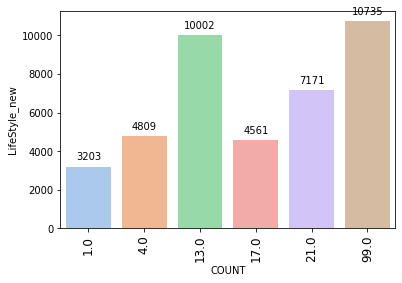

2.0


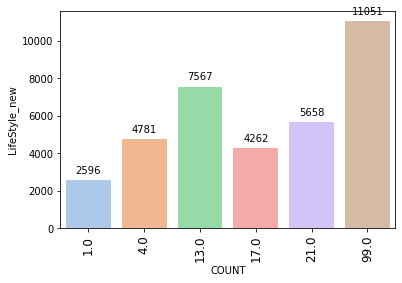

3.0


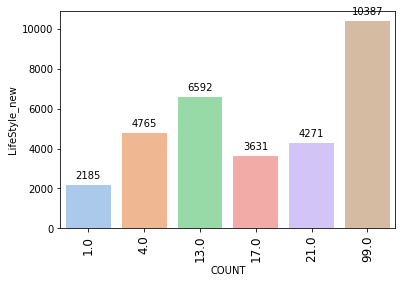

4.0


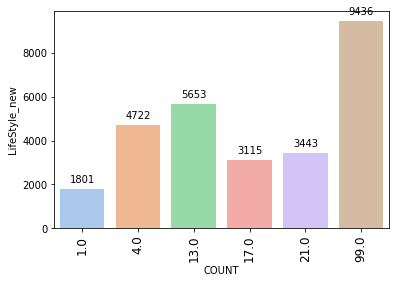

5.0


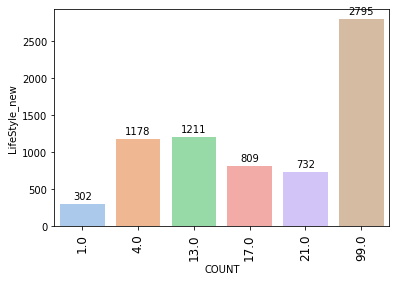

6.0


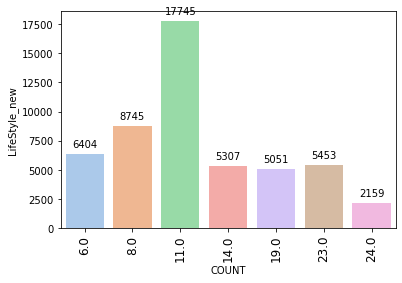

7.0


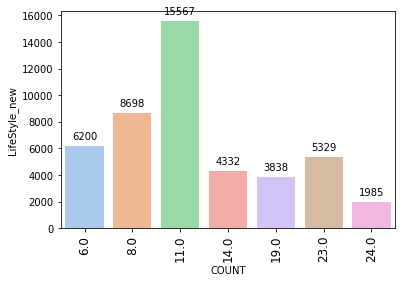

8.0


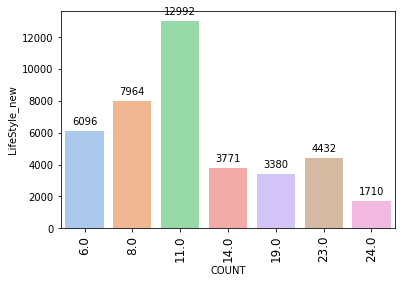

9.0


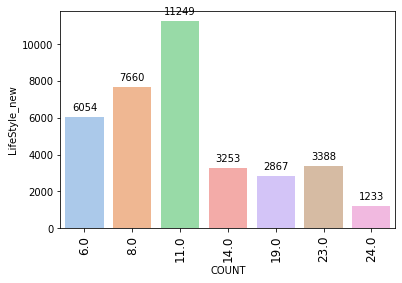

10.0


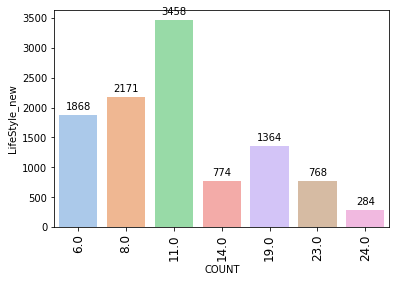

11.0


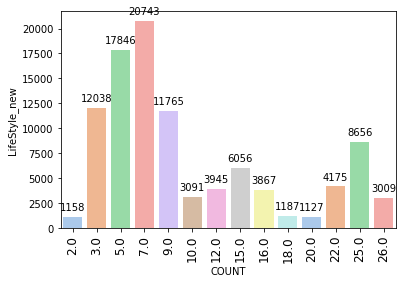

12.0


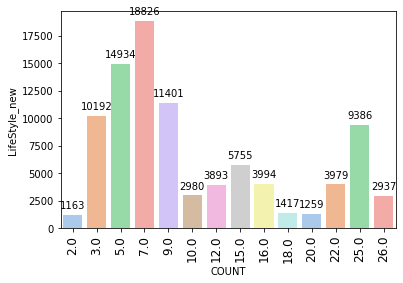

13.0


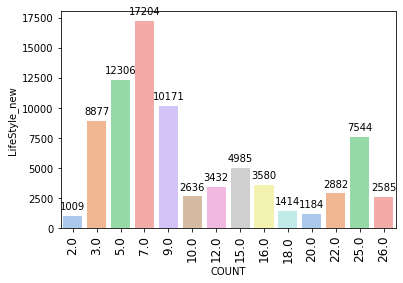

14.0


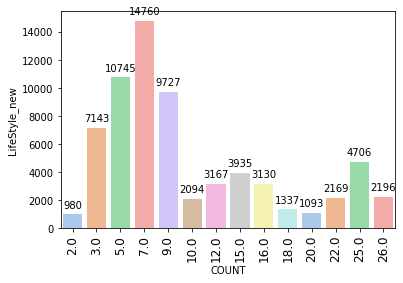

15.0


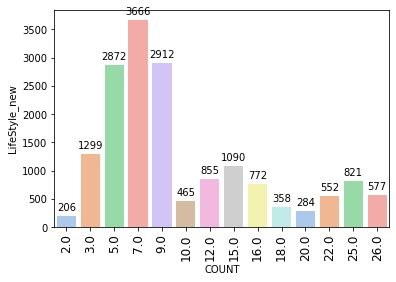

In [109]:
for i in set(df['cus_cluster_3']):
    print(i)
    temp= df[df['cus_cluster_3']==i]
    
    df2=pd.DataFrame(temp['LifeStyle_new'].value_counts())
    a=df2.index
    df2['COUNT']=a
    df2=df2.reset_index()
    df2=df2[['LifeStyle_new','COUNT']]
    df2=df2.sort_values(by='LifeStyle_new',ascending=False)
    df2=df2[:30]
    g = sns.barplot(data=df2, x="COUNT", y="LifeStyle_new", palette='pastel', ci=None)
    ax = g

    #annotate axis = seaborn axis 
    for p in ax.patches: 
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
           ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
           textcoords='offset points') 

    plt.xticks(fontsize=12, rotation=90)
    plt.show()

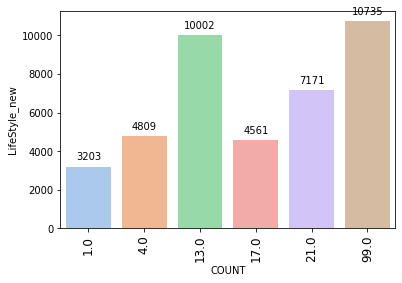

In [108]:
g = sns.barplot(data=df2, x="COUNT", y="LifeStyle_new", palette='pastel', ci=None)
ax = g

#annotate axis = seaborn axis 
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=12, rotation=90)
plt.show()

In [ ]:
sns.violinplot(data=df, x="label", y="value")
plt.show() 